In [1]:
# 1. 과거 주가 정보를 수집하는 방법
# 2. 시계열 예측 작업을 위한 데이터셋 형식을 구성하는 방법
# >>
# >>
# //
# 3. 회귀 모델을 사용해 미래 주가를 예측하는 방법

# 4. 장단기 메모리(Long short-term memory, LSTM) 기초
# 5. LSTM으로 예측 성능을 높이는 방법

# 6. 텐서보드(Tensorboard)에 성능을 시각화하는 방법


### 입력 데이터셋 _ 코사인과 주가

In [2]:
import numpy as np
import pandas as pd 

In [3]:
### input datasets _ cosine N stcok 
#### cosine => 2개의 일차원 신호 => 사용 
# + 균일한 잡음을 추가

In [4]:
# 왜 균일한 잡음을 추가하지 ? 
# 왜 씨드는 굳이 101? ㅋㅋㅋ


In [5]:
# 1.
# 점의 개수, 신호 주기, 균일한 잡음 생성기의 절대 강도가 매개변수로 주어졌을 때
# 코사인 신호를 생성하는 함수
# seq_len : 점의 개수 // frequency : 신호주기 // noise  : 잡음
# 코사인 벨류를 가지고 온다. 
def fetch_cosine_values(seq_len, frequency = 0.01, noise = 0.1) :
    np.random.seed(101)
    # random_ seed : fetch_cosine_values가 가진 범위 안에서 난수 수열을 랜덤으로 생성..101 
    x = np.arange(0.0, seq_len, 1.0)
    
    return np.cos( 2 * np.pi * frequency * x ) + np.random.uniform(low=-noise, high=noise, size=seq_len)

In [6]:
# 한 주기(period): 10개의 점 + 0.1 잡음이 추가된 코사인을 출력
print( fetch_cosine_values(10, frequency=0.1))

[ 1.00327973  0.82315051  0.21471184 -0.37471266 -0.7719616  -0.93322063
 -0.84762375 -0.23029438  0.35332577  0.74700479]


In [7]:
# 파이_ np.pi
J = np.arange(0.0, 10, 1.0)
np.cos(2 * np.pi * 0.01 * J), np.random.uniform(low=-0.1, high=0.1, size=10)

(array([1.        , 0.99802673, 0.9921147 , 0.98228725, 0.96858316,
        0.95105652, 0.92977649, 0.90482705, 0.87630668, 0.84432793]),
 array([ 0.01084552, -0.02957361, -0.06362152,  0.05712035,  0.09309664,
        -0.05352927, -0.08328771,  0.02070968,  0.04579855, -0.04475223]))

In [8]:
# https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html
# np.random.uniform : 균일 한 분포에서 표본을 추출
np.cos(2 * np.pi * 0.01 * J) + np.random.uniform(low=-0.1, high=0.1, size=10)

array([1.03706127, 1.00160022, 0.90181161, 0.9098611 , 0.90597665,
       1.0499201 , 0.93390957, 0.92058496, 0.92327049, 0.85272028])

In [9]:
# 2. 
# 파이썬 라이브러리 : quandl
# $ curl "https://www.quandl.com/api/v3/datasets/WIKI/FB/data.csv"
# 퀀들에서 제공되는 => 과거 주식 데이터(1473) 다운
# dic 안에 담아서 구조확인 

In [10]:
! curl "https://www.quandl.com/api/v3/datasets/WIKI/FB/data.csv"

Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0
2018-03-26,160.82,161.1,149.02,160.06,125438294.0,0.0,1.0,160.82,161.1,149.02,160.06,125438294.0
2018-03-23,165.44,167.1,159.02,159.39,52306891.0,0.0,1.0,165.44,167.1,159.02,159.39,52306891.0
2018-03-22,166.13,170.27,163.72,164.89,73389988.0,0.0,1.0,166.13,170.27,163.72,164.89,73389988.0
2018-03-21,164.8,173.4,163.3,169.39,105350867.0,0.0,1.0,164.8,173.4,163.3,169.39,105350867.0
2018-03-20,167.47,170.2,161.95,168.15,128925534.0,0.0,1.0,167.47,170.2,161.95,168.15,128925534.0
2018-03-19,177.01,177.17,170.06,172.56,86897749.0,0.0,1.0,177.01,177.17,170.06,172.56,86897749.0
2018-03-16,184.49,185.33,183.41,185.09,23090480.0,0.0,1.0,184.49,185.33,183.41,185.09,23090480.0
2018-03-15,183.24,184.0,182.19,183.86,15461869.0,0.0,1.0,183.24,184.0,182.19,183.86,15461869.0
2018-03-14,182.6,184.25,181

2014-07-22,69.76,69.77,68.61,69.27,40301800.0,0.0,1.0,69.76,69.77,68.61,69.27,40301800.0
2014-07-21,68.81,69.96,68.5,69.4,49431600.0,0.0,1.0,68.81,69.96,68.5,69.4,49431600.0
2014-07-18,66.8,68.46,66.16,68.4199,42262200.0,0.0,1.0,66.8,68.46,66.16,68.4199,42262200.0
2014-07-17,67.03,67.85,66.04,66.4099,38024200.0,0.0,1.0,67.03,67.85,66.04,66.4099,38024200.0
2014-07-16,67.54,67.94,67.07,67.66,29541600.0,0.0,1.0,67.54,67.94,67.07,67.66,29541600.0
2014-07-15,67.96,68.0899,66.26,67.165,44213200.0,0.0,1.0,67.96,68.0899,66.26,67.165,44213200.0
2014-07-14,67.13,68.17,66.9,67.9,38468000.0,0.0,1.0,67.13,68.17,66.9,67.9,38468000.0
2014-07-11,65.28,66.59,64.79,66.34,39167800.0,0.0,1.0,65.28,66.59,64.79,66.34,39167800.0
2014-07-10,63.31,65.34,63.05,64.8725,44388200.0,0.0,1.0,63.31,65.34,63.05,64.8725,44388200.0
2014-07-09,63.41,65.12,63.15,64.97,51378000.0,0.0,1.0,63.41,65.12,63.15,64.97,51378000.0
2014-07-08,65.06,65.56,62.21,62.76,68855600.0,0.0,1.0,65.06,65.56,62.21,62.76,68855600.0
2014-07-07,66

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2240    0  2240    0     0   1447      0 --:--:--  0:00:01 --:--:--  1447
100  132k    0  132k    0     0  76631      0 --:--:--  0:00:01 --:--:-- 76631


In [11]:
k1 = '1, 2, 3, 4, 5, 6'
k2 = '0,10,20,33,34,51'

ic = {}
for row, col in zip(k1.split(','), k2.split(',')) : 
    ic[row] = col
print(ic)


{'1': '0', ' 2': '10', ' 3': '20', ' 4': '33', ' 5': '34', ' 6': '51'}


In [12]:
# dic 
s1 = "Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume"
s2 = "2018-03-27,156.31,162.85,150.75,152.19,76787884.0,0.0,1.0,156.31,162.85,150.75,152.19,76787884.0"

dic = {}
for i, j in zip(s1.split(','), s2.split(',')) :
    dic[i] = j
print(dic)

{'Date': '2018-03-27', 'Open': '156.31', 'High': '162.85', 'Low': '150.75', 'Close': '152.19', 'Volume': '76787884.0', 'Ex-Dividend': '0.0', 'Split Ratio': '1.0', 'Adj. Open': '156.31', 'Adj. High': '162.85', 'Adj. Low': '150.75', 'Adj. Close': '152.19', 'Adj. Volume': '76787884.0'}


In [13]:
# .csv
# 날짜, 시가, 고가, 저가, 종가, 조정가, 몇 가지 거래량, *조정 마감가*
# 시가 : 장이 오픈하고 처음 거래 금액
# 고가 : 장이 시작하고 마감하기 전까지 금액중 가장 높은 거래금액
# 종가 :  거래 마감금액( 마감후)
# >>>  https://m.blog.naver.com/ant04160/220629792721
# 조정가 : 
# 조정 마감가 : 
# 개념 조사 *** 

In [14]:
# 파이썬 API를 사용해 조정가를 추출하는 파이썬 함수
# https://docs.quandl.com/v1.0/docs

In [15]:
import os
import pickle
import quandl

In [16]:
# !pip install quandl

In [17]:
# datetime.date를 API에서 필요로 하는 
# 형태의 적합한 문자열 형식으로 변환하는 헬퍼 함수 
def date_obj_to_str(date_obj):
    # yyyy-mm-dd
    return date_obj.strftime('%y-%m-%d')

In [18]:
# pickle => dump
# 원형을 보존해서 박스에 담는다라는 개념인듯

In [19]:
# something :  담고자 하는것 path : 그 경로 
# save_pickle  : Deep_check_N 
def save_pickle(something, path): 
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
        with open(path, 'wb') as fh:
            # 
            pickle.dump(something, fh , pickle.DEFAULT_PROTOCOL)

In [20]:
def load_pickle(path):
    with open(path, 'rb') as fh :
        return pickle.load(fh)

In [21]:
# api 개인 (quandl = "kF3tPMFDQoSdoL6MUs8s" )
quandl.ApiConfig.api_key =  "kF3tPMFDQoSdoL6MUs8s"

In [22]:
# 해당 '종목 기호'에 대한 과거 데이터를 가져오기 위해 
# 호출 결과를 캐시에 저장하고 가져올 데이터의 시작과 끝의 타임스탬프를 지정할 수 있어야 한다.

# 일차원 배열로 요청한 '종목 기호'에 대한 주가를 포함하고 있으며,
# from_date에서 to_date로 정렬되어 있다

#  데이터의 시작과 끝의 타임스탬프 >>> 이건가 ? 

# 캐싱은 함수 내에서 이뤄지며,
# 이는 데이터가 캐시에서 발견되지 않으면 quandle API가 호출됨을 뜻한다
# from_date,  to_date =>  아무거나 넣는것이 아니라 형식에 맞게

In [23]:
# symbol :  회사 
# from_date, to_date  : 
# cache_path : 캐시 경로 
def fetch_stock_price(symbol, from_date, to_date, cache_path = './tmp/prices/'):
    # 
    assert(from_date <= to_date)
    filename = "{}_{}_{}.pk".format(symbol, str(from_date), str(to_date))
    # deep_check
    price_filepath = os.path.join(cache_path, filename)
    
    # 예외처리 
    try : 
        price = load_pickle(price_filepath)
        print("--")
        print("loaded from", price_filepath)
    except IOError :
        #  pk된 파일이 없으면 aip 통해서 재 생성 ?? _check
        historic = quandl.get("WIKI/" + symbol,
                              start_date = date_obj_to_str(from_date),
                              end_date   = date_obj_to_str(to_date))
        
        prices = historic["Adj. Close"].tolist()
        save_pickle(prices , price_filepath)
        print("saved into", price_filepath)
    return prices
    
# fetch_stock_price 반환 한 객체는 일차원 배열로 요청한 종목 기호에 대한 주가를 포함 
# + 데이터가 캐시에서 발견 안되면 api를 호춯
# check >>> path 

In [24]:
import datetime

In [25]:
# 2017.01 구글 주가(종목 기호 : GOOG) 조정가 출력
#print(fetch_stock_price("GOOG", datetime.date(2017, 1, 1), datetime.date(2017, 1, 31)))

### 데이터 셋 포멧 구성 

In [26]:
c_v = fetch_cosine_values(20, frequency = 0.1)
val = c_v
t_f = 5
f_sp = [] 
for i in range(len(val) - t_f ):
    f_sp.append(val[i + t_f])
print (f_sp)

[-0.9332206274727847, -0.8476237504404999, -0.23029437843826808, 0.35332576672860816, 0.7470047852159067, 1.0108455182249574, 0.7794433851802703, 0.24539547490696345, -0.25189664200207534, -0.7159203498925534, -1.0535292676370478, -0.892304707642279, -0.28830730991670417, 0.35481554583247055, 0.7642647600743997]


In [27]:
fts = np.vstack(f_sp)
labl = np.array(val[t_f :])

fts , labl

(array([[-0.93322063],
        [-0.84762375],
        [-0.23029438],
        [ 0.35332577],
        [ 0.74700479],
        [ 1.01084552],
        [ 0.77944339],
        [ 0.24539547],
        [-0.25189664],
        [-0.71592035],
        [-1.05352927],
        [-0.89230471],
        [-0.28830731],
        [ 0.35481555],
        [ 0.76426476]]),
 array([-0.93322063, -0.84762375, -0.23029438,  0.35332577,  0.74700479,
         1.01084552,  0.77944339,  0.24539547, -0.25189664, -0.71592035,
        -1.05352927, -0.89230471, -0.28830731,  0.35481555,  0.76426476]))

In [28]:
# 
def format_dataset(values, temporal_features) : 
    # 
    feat_splits = [] 
    for i in range(len(values) - temporal_features):
        feat_splits.append(values[i:i+temporal_features])
        
    # 모든 관측값 => 레이블과 함께 세로로 연결
    # https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
    #vstack : 배열을 수직으로 
    feats  = np.vstack(feat_splits)
    labels = np.array(values[temporal_features:])
    
    # 정해진 개수의 열을 갖는 관측값과 레이블 벡터
    return feats, labels

In [29]:
vals = fetch_cosine_values(100, frequency = 0.1)
format_dataset(vals,5)

(array([[ 1.00327973,  0.82315051,  0.21471184, -0.37471266, -0.7719616 ],
        [ 0.82315051,  0.21471184, -0.37471266, -0.7719616 , -0.93322063],
        [ 0.21471184, -0.37471266, -0.7719616 , -0.93322063, -0.84762375],
        [-0.37471266, -0.7719616 , -0.93322063, -0.84762375, -0.23029438],
        [-0.7719616 , -0.93322063, -0.84762375, -0.23029438,  0.35332577],
        [-0.93322063, -0.84762375, -0.23029438,  0.35332577,  0.74700479],
        [-0.84762375, -0.23029438,  0.35332577,  0.74700479,  1.01084552],
        [-0.23029438,  0.35332577,  0.74700479,  1.01084552,  0.77944339],
        [ 0.35332577,  0.74700479,  1.01084552,  0.77944339,  0.24539547],
        [ 0.74700479,  1.01084552,  0.77944339,  0.24539547, -0.25189664],
        [ 1.01084552,  0.77944339,  0.24539547, -0.25189664, -0.71592035],
        [ 0.77944339,  0.24539547, -0.25189664, -0.71592035, -1.05352927],
        [ 0.24539547, -0.25189664, -0.71592035, -1.05352927, -0.89230471],
        [-0.25189664, -0.

In [30]:
# # fetch_cosine_values, fetch_stock_price, format_dataset

# def fetch_cosine_values(seq_len, frequency = 0.01, noise = 0.1) :
#     np.random.seed(101)
#     # random_ seed : fetch_cosine_values가 가진 범위 안에서 난수 수열을 랜덤으로 생성..101 
#     x = np.arange(0.0, seq_len, 1.0)
    
#     return np.cos( 2 * np.pi * frequency * x ) + np.random.uniform(low=-noise, high=noise, size=seq_len)

# def fetch_stock_price(symbol, from_date, to_date, cache_path = './tmp/prices/'):
#     # 
#     assert(from_date <= to_date)
#     filename = "{}_{}_{}.pk".format(symbol, str(from_date), str(to_date))
#     # deep_check
#     price_filepath = os.path.join(cache_path, filename)
    
#     # 예외처리 
#     try : 
#         price = load_pickle(price_filepath)
#         print("--")
#         print("loaded from", price_filepath)
#     except IOError :
#         #  pk된 파일이 없으면 aip 통해서 재 생성 ?? _check
#         historic = quandl.get("WIKI/" + symbol,
#                               start_date = date_obj_to_str(from_date),
#                               end_date   = date_obj_to_str(to_date))
        
#         prices = historic["Adj. Close"].tolist()
#         save_pickle(prices , price_filepath)
#         print("saved into", price_filepath)
#     return prices

# def format_dataset(values, temporal_features) : 
#     # 
#     feat_splits = [] 
#     for i in range(len(values) - temporal_features):
#         feat_splits.append(values[i + temporal_features])
        
#     # 모든 관측값 => 레이블과 함께 세로로 연결
#     # https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html
#     #vstack : 배열을 수직으로 
#     feats  = np.vstack(feat_splits)
#     labels = np.array(values[temporal_features :])
    
#     # 정해진 개수의 열을 갖는 관측값과 레이블 벡터
#     return feats, labels

In [31]:
import datetime
import matplotlib.pyplot as plt
import numpy as np 
import seaborn

# from tools import fetch_cosine_values, fetch_stock_price, format_dataset
#  누구니 너 ? (set_printoptions)
np.set_printoptions(precision=2)

In [32]:
# Print 2 oscillations (20 points, with a frequency of 0.1, i.e. a period of 10)
# 주기 10, 20개의 점을 갖는 코사인 시계열

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


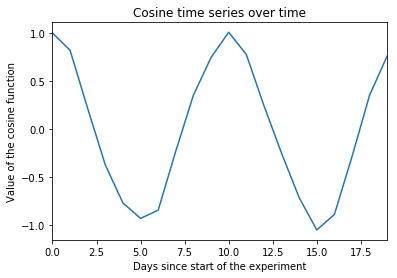

In [33]:
cos_values = fetch_cosine_values(20 , frequency= 0.1)
seaborn.tsplot(cos_values)
plt.xlabel("Days since start of the experiment")
plt.ylabel("Value of the cosine function")
plt.title("Cosine time series over time")
plt.show()

In [34]:
print(cos_values)

[ 1.    0.82  0.21 -0.37 -0.77 -0.93 -0.85 -0.23  0.35  0.75  1.01  0.78
  0.25 -0.25 -0.72 -1.05 -0.89 -0.29  0.35  0.76]


In [35]:
# 20개 포인트 ? 
print(cos_values.shape)

(20,)


In [36]:
# 머신러닝 알고리즘에서 받아들일 수 있는 형식으로  
# => 5개의 열을 가지는 관측행렬 

features_size = 5
# 15*5 크기의 관측 값 행렬 그리고 15개의 요소를 갖는 레이블 백터 
minibatch_cos_X , minibatch_cos_y  = format_dataset(cos_values , features_size)
print('minibatch_cos_X.shape : ', minibatch_cos_X.shape)
print('minibatch_cos_y.shape : ', minibatch_cos_y.shape)

minibatch_cos_X.shape :  (15, 5)
minibatch_cos_y.shape :  (15,)


In [37]:
# 15x5 크기의 관측값 행렬 
# 15개의 요소를 갖는 레이블 벡터_하나씩 밀린다는거를 인지 하고 있어야함 
minibatch_cos_X

array([[ 1.  ,  0.82,  0.21, -0.37, -0.77],
       [ 0.82,  0.21, -0.37, -0.77, -0.93],
       [ 0.21, -0.37, -0.77, -0.93, -0.85],
       [-0.37, -0.77, -0.93, -0.85, -0.23],
       [-0.77, -0.93, -0.85, -0.23,  0.35],
       [-0.93, -0.85, -0.23,  0.35,  0.75],
       [-0.85, -0.23,  0.35,  0.75,  1.01],
       [-0.23,  0.35,  0.75,  1.01,  0.78],
       [ 0.35,  0.75,  1.01,  0.78,  0.25],
       [ 0.75,  1.01,  0.78,  0.25, -0.25],
       [ 1.01,  0.78,  0.25, -0.25, -0.72],
       [ 0.78,  0.25, -0.25, -0.72, -1.05],
       [ 0.25, -0.25, -0.72, -1.05, -0.89],
       [-0.25, -0.72, -1.05, -0.89, -0.29],
       [-0.72, -1.05, -0.89, -0.29,  0.35]])

In [38]:
minibatch_cos_y

array([-0.93, -0.85, -0.23,  0.35,  0.75,  1.01,  0.78,  0.25, -0.25,
       -0.72, -1.05, -0.89, -0.29,  0.35,  0.76])

In [39]:
for i in range(5) : 
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]
    print("Observation {} : X={} y={}".format(i, feats, label))

Observation 0 : X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1 : X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504404999
Observation 2 : X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3 : X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4 : X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


In [40]:
 # plt.subplot(5, 1, i+1)

In [41]:
range(i, features_size+i)

range(4, 9)

Observation 0 : X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1 : X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504404999
Observation 2 : X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3 : X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4 : X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


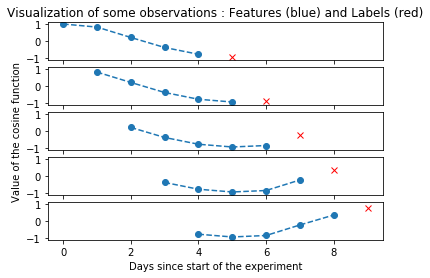

In [42]:
# 시각화  _ 어떤식으로 예측하게 되는지 확인 
# _check it 
samples_to_plot = 5
# plt.subplots :한 번의 호출로 그림 개체+그림의 공통 레이아웃을 보여줌
# deep_check_ N(steel)
#f = fig, axarr 
f, axarr = plt.subplots(samples_to_plot, sharex = True)
for i in range(samples_to_plot) : 
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]
    print("Observation {} : X={} y={}".format(i, feats, label))
    
   # plt.subplot(samples_to_plot, 1, i+1)_check(done)
    axarr[i].plot(range(i, features_size+i), feats, '--o')
    #
    axarr[i].plot([features_size+i], label, 'rx')
    #
    axarr[i].set_ylim([-1.1, 1.1])
    
plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations : Features (blue) and Labels (red)")
plt.show()

In [43]:
# os.path.join("./tmp/prices/", "MSFT_2015-01-01_2016-12-31.pk")
# './tmp/prices/MSFT_2015-01-01_2016-12-31.pk'

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/KO_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AAL_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/MMM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AXP_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GE_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/JPM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/UPS_2015-01-01_2016-12-31.pk


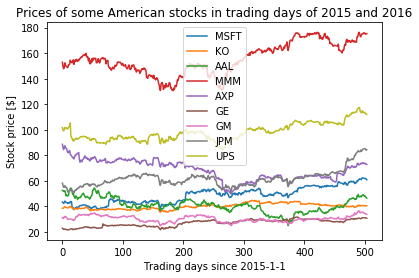

In [44]:
symbols = ["MSFT", "KO", "AAL", "MMM", "AXP", "GE", "GM", "JPM", "UPS"]
ax = plt.subplot(1, 1, 1) 
for sym in symbols :
    prices = fetch_stock_price(sym, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
    ax.plot(range(len(prices)), prices, label = sym)
    # 각 회사 이름을 레이블    

#https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html
# 한 그래프에 여러그래프를 조합
handles, labels = ax.get_legend_handles_labels()
#
ax.legend(handles, labels)
plt.xlabel("Trading days since 2015-1-1")
plt.ylabel("Stock price [$]")
plt.title("Prices of some American stocks in trading days of 2015 and 2016")
plt.show()

### 회귀 모델을 이용한 미래 주가 예측

#### 회귀분석 ( regression analysis )
관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 **적합도를 측정** 해 내는 분석 방법이다.

*회귀분석은 시간에 따라 변화하는 데이터나 어떤 영향, 가설적 실험, 인과 관계의 모델링등의 통계적 예측에 이용될 수 있다. 그러나 많은 경우 가정이 맞는지 아닌지 적절하게 밝혀지지 않은 채로 이용되어 그 결과가 오용되는 경우도 있다. *

In [45]:
# 관측 행렬과 실제 값 레이블이 주어지면 
# 처음에는 이 문제를 회귀 문제로 풀고 싶기 마련이다.
# 이 경우 회귀는 매우 간단
# 수치 벡터에서 수치 값을 예측하는 것
# => 이상적인 방법이 아니다

# 문제를 회귀 문제로 다루게 되면
# 알고리즘은 각 특징이 독립적이라고 간주해야 한다
# 그러나 이 예제에서 각 특징은
# 동일한 시계열의 슬라이딩 윈도우이므로 서로 상관되어 있다

# 우선 '각 특징이 독립적'이라는 단순한 가정에서 시작

In [46]:
# 평가 함수 -> 모델을 평가하기 위해서 주어짐 : 관측 행렬, 실제 레이블, 예측 레이블 
# 평균 제곱 오차 & 평균 절대 오차를 출력하는 함수 생성 
#=> 성능은 시각적으로 확인 할 수 있게 
# 훈련, 테스트, 예측 시계열을 겹쳐서*** 그래프 그림 

In [47]:
#---------------------------------------------------

In [48]:
# 행렬을 일차원 배열로 변환하는 헬퍼 함수
# tool.py 
def matrix_to_array(m) :
    return np.asarray(m).reshape(-1)

In [49]:
# import numpy as np
# from matplotlib import pylab as plt
# from tools import matrix_to_array

In [50]:
# np.mean   : 지정된 축을 따라 산술 평균을 계산
# np.square : 입력의 요소 별 제곱을 반환합니다.

In [51]:
# 평가 함수 (Evaluation function)
def evaluate_ts(features, y_true, y_pred):
    print("Evaluation of the predictions :")
    # 평균 제곱 오차 (Mean Squared Error)
    print("MSE(평균 제곱 오차) : ", np.mean(np.square(y_true - y_pred)))
    # 평균 절대 오차 (Mean Absolute Error)
    print("MAE(평균 절대 오차) : ", np.mean(np.abs(y_true - y_pred)))
    
    #
    print("Benchmark : if prediction == last feature")
    print("MSE : ", np.mean(np.square(features[:,-1]- y_true)))
    print("mae : ", np.mean(np.abs(features[:,-1]- y_true)))
    
    #  성능을 시각적으로 확인 할 수 있게 
    plt.plot(matrix_to_array(y_true), 'b')
    plt.plot(matrix_to_array(y_pred), 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()
    
    #
    error = np.abs(matrix_to_array(y_pred)- matrix_to_array(y_true))
    plt.plot(error,'r')
    fit   = np.polyfit(range(len(error)), error, deg = 1)
    plt.plot(fit[0] * range(len(error)) + fit[1], '--')
    plt.xlabel("Days")
    plt.ylabel("Prediction error L1 norm")
    plt.title("Prediction error (absolute) and trendline")
    plt.show()

In [52]:
#install --upgrade pip
#! python -m pip install --upgrade pip

# 1.14.1
# !pip uninstall tensorflow
# !pip install tensorflow==1.14

#gpu
# pip uninstall tensorflow-gpu -y
# pip install tensorflow-gpu==1.14

In [53]:
def regression_ANN(x, weights, biases ):
    return tf.add(biases, tf.matmul(x, weights))

In [54]:
# 모델링 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf 
# RNN
from tensorflow.contrib import rnn

C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\JerryKim\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\JerryKim\AppData

In [55]:
# 시드값 설정 
tf.reset_default_graph()
tf.set_random_seed(101)

Training iteration 0 MSE 4.394244
Training iteration 1 MSE 1.3426101
Training iteration 2 MSE 1.2859138
Training iteration 3 MSE 1.842526
Training iteration 4 MSE 1.6616914
Training iteration 5 MSE 0.9931676
Training iteration 6 MSE 0.39235505
Training iteration 7 MSE 0.1808808
Training iteration 8 MSE 0.32896873
Training iteration 9 MSE 0.5551951
Training iteration 10 MSE 0.60370296
Training iteration 11 MSE 0.44349524
Training iteration 12 MSE 0.22051534
Training iteration 13 MSE 0.10052771
Training iteration 14 MSE 0.14700666
Training iteration 15 MSE 0.29074192
Training iteration 16 MSE 0.40164787
Training iteration 17 MSE 0.39934188
Training iteration 18 MSE 0.30271065
Training iteration 19 MSE 0.1933159
Training iteration 20 MSE 0.14344187
Training iteration 21 MSE 0.16518213
Training iteration 22 MSE 0.21137287
Training iteration 23 MSE 0.22246566
Training iteration 24 MSE 0.17670819
Training iteration 25 MSE 0.10183805
Training iteration 26 MSE 0.046028074
Training iteration 27

Training iteration 219 MSE 0.015713166
Training iteration 220 MSE 0.01564912
Training iteration 221 MSE 0.015585264
Training iteration 222 MSE 0.015521603
Training iteration 223 MSE 0.015458137
Training iteration 224 MSE 0.015394865
Training iteration 225 MSE 0.015331793
Training iteration 226 MSE 0.015268912
Training iteration 227 MSE 0.0152062345
Training iteration 228 MSE 0.015143758
Training iteration 229 MSE 0.015081473
Training iteration 230 MSE 0.015019395
Training iteration 231 MSE 0.014957516
Training iteration 232 MSE 0.01489584
Training iteration 233 MSE 0.014834364
Training iteration 234 MSE 0.014773092
Training iteration 235 MSE 0.014712024
Training iteration 236 MSE 0.0146511635
Training iteration 237 MSE 0.014590507
Training iteration 238 MSE 0.014530054
Training iteration 239 MSE 0.014469808
Training iteration 240 MSE 0.01440977
Training iteration 241 MSE 0.014349937
Training iteration 242 MSE 0.014290316
Training iteration 243 MSE 0.014230902
Training iteration 244 MSE

Training iteration 491 MSE 0.005598283
Training iteration 492 MSE 0.00558301
Training iteration 493 MSE 0.005567843
Training iteration 494 MSE 0.005552781
Training iteration 495 MSE 0.005537823
Training iteration 496 MSE 0.005522968
Training iteration 497 MSE 0.0055082166
Training iteration 498 MSE 0.0054935664
Training iteration 499 MSE 0.005479019
Training iteration 500 MSE 0.005464574
Training iteration 501 MSE 0.005450228
Training iteration 502 MSE 0.0054359823
Training iteration 503 MSE 0.0054218373
Training iteration 504 MSE 0.005407791
Training iteration 505 MSE 0.005393842
Training iteration 506 MSE 0.00537999
Training iteration 507 MSE 0.0053662383
Training iteration 508 MSE 0.005352581
Training iteration 509 MSE 0.005339021
Training iteration 510 MSE 0.005325556
Training iteration 511 MSE 0.0053121857
Training iteration 512 MSE 0.0052989107
Training iteration 513 MSE 0.0052857287
Training iteration 514 MSE 0.0052726404
Training iteration 515 MSE 0.0052596447
Training iteratio

Training iteration 760 MSE 0.0038199648
Training iteration 761 MSE 0.0038181108
Training iteration 762 MSE 0.0038162747
Training iteration 763 MSE 0.003814453
Training iteration 764 MSE 0.0038126481
Training iteration 765 MSE 0.0038108563
Training iteration 766 MSE 0.0038090814
Training iteration 767 MSE 0.0038073214
Training iteration 768 MSE 0.0038055761
Training iteration 769 MSE 0.0038038462
Training iteration 770 MSE 0.0038021307
Training iteration 771 MSE 0.0038004303
Training iteration 772 MSE 0.0037987437
Training iteration 773 MSE 0.003797072
Training iteration 774 MSE 0.0037954145
Training iteration 775 MSE 0.0037937716
Training iteration 776 MSE 0.0037921413
Training iteration 777 MSE 0.0037905267
Training iteration 778 MSE 0.0037889255
Training iteration 779 MSE 0.0037873376
Training iteration 780 MSE 0.003785763
Training iteration 781 MSE 0.003784203
Training iteration 782 MSE 0.0037826572
Training iteration 783 MSE 0.003781122
Training iteration 784 MSE 0.0037796018
Train

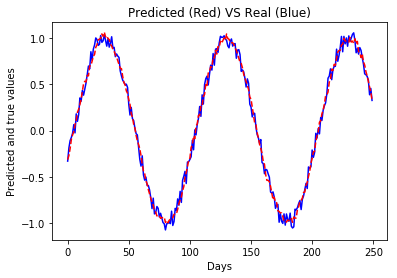

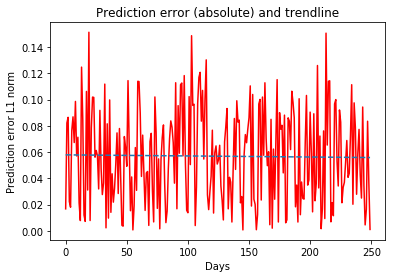

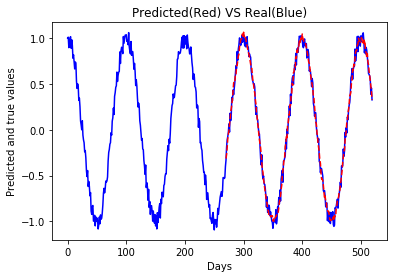

In [60]:
# 시드값 설정 
tf.reset_default_graph()
tf.set_random_seed(101)
# 코사인 신호 생성 그 신호를 관측 

# ***Settings for the dataset creation
# 특징 크기로 대략 한 달의 영업일수에 해당하는 20을 사용
# => 과거 코사인의 값이 20개가 주어졌을 때 다음 날의 값을 예측하는 문제
feat_dimension = 20
# 1년 250개의 관측 값 (1년 영업일 기준 250일 미만)
train_size    = 250
test_size     = 250
# Settings for tensorflow
# 1. 학습 속도
# 2. 사용할 최적화 알고리즘
# 3. 세대 수(훈련시킬 때 훈련 데이터셋이 학습 모델에 얼마나 많이 들어가는지)

learning_rate = 0.1
optimizer     = tf.train.AdamOptimizer
n_epochs      = 1000

# 관측 행렬 
# 하나의 코사인 값을 생성 -> 둘 개로 나눈다. 
# 훈련데이터, 테스트데이터 

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

# 분석 속도를 높이기위해서 -> np.float32
train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X  = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y  = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

# 플레이스홀더 정의 
# 어디서나 사용가능하게 관측 값의 개수가 아닌 특징의 개수만 
X_tf = tf.placeholder("float", shape =(None, feat_dimension), name= "X")
y_tf = tf.placeholder("float", shape =(None, 1), name= "y")

# tensorflow로 구현된 회귀 알고리즘 
# 우리는 회귀 알고리즘을 구현하는 가장 전통적인 방식 
# 즉, 관측행렬을 가중치 배열과 곱해서 편향값을 더하는 방식을 선택했다. 
# 결과(이 함수의 반환값)는 x에 포함된 모든 관측값에 대한 예측값을 대한 예측값을 포함한 배열이다.

weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean = 0.0, stddev = 1.0), name="weights")
biases  = tf.Variable(tf.zeros([1,1]), name="bias")

# 예측값, 비용이 계산이 계산되는 방식과 훈련 방식 
y_pred   = regression_ANN(X_tf, weights, biases)
cost     = tf.reduce_mean(tf.square(y_tf- y_pred))
train_op = optimizer(learning_rate).minimize(cost)

# 변수 초기화 
# 루프-> 훈련데이터 셋 -> 텐서플로우그래프 
# 반복할때마다 MSE(평균 제곱 오차)


with tf.Session() as sess :
    # 변수 초기화 
    sess.run(tf.global_variables_initializer())
    # 한 세대마다 전체 훈련 데이터 셋이 텐서플로 그래프에 공급 
    
    for i in range(n_epochs):
        train_cost,_ = sess.run([cost, train_op], feed_dict={X_tf:train_X, y_tf:train_y})
        print("Training iteration", i, "MSE", train_cost)
    
    # 훈련시킨 다음 테스트 데이터 셋에 대해 성능을 확인
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf:test_X, y_tf: test_y})
    print("Test dataset: ", test_cost)
    
    # 결과 평가 
    evaluate_ts(test_X, test_y, y_pr)
    
    # 예측값이 어떻게 보이는지 확인 
    plt.plot(range(len(cos_values)), cos_values, 'b')
    plt.plot(range(len(cos_values)-test_size, len(cos_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted(Red) VS Real(Blue)")
    plt.show()# 코사인 신호 생성 그 신호를 관측 


In [62]:
# cos_values = fetch_cosine_values(250 + 250 + 20)
# minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, 20)

In [63]:
#print(minibatch_cos_y[:250].reshape(-1, 1))
tf.reset_default_graph()
tf.set_random_seed(101)

In [64]:
symbol         = "MSFT"
feat_dimension = 20
train_size     = 252
test_size      = 252 - feat_dimension

In [65]:
# 텐서 플로우 설정 
learning_rate = 0.05
optimizer     = tf.train.AdamOptimizer
n_epochs      = 1000

In [66]:
# 텐서 플로우 설정 
learning_rate = 0.5
optimizer     = tf.train.AdamOptimizer
n_epochs      = 20000

In [67]:
# 주가를 가져와 훈련데이터와 테스트 데이터를 분할
stock_values = fetch_stock_price(symbol, datetime.date(2015,1,1), datetime.date(2016,12,31))
minibatch_stock_X, minibatch_stock_y = format_dataset(stock_values, feat_dimension)

# 분석 속도를 높이기위해서 -> np.float32
train_X = minibatch_stock_X[:train_size, :].astype(np.float32)
train_y = minibatch_stock_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X  = minibatch_stock_X[train_size:, :].astype(np.float32)
test_y  = minibatch_stock_y[train_size:].reshape((-1, 1)).astype(np.float32)

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk


In [68]:
X_tf = tf.placeholder("float", shape = (None, feat_dimension), name= "X")
y_tf = tf.placeholder("float", shape = (None, 1), name= "y")

In [69]:
# tensorflow로 구현된 회귀 알고리즘 
# 우리는 회귀 알고리즘을 구현하는 가장 전통적인 방식 
# 즉, 관측행렬을 가중치 배열과 곱해서 편향값을 더하는 방식을 선택했다. 
# 결과(이 함수의 반환값)는 x에 포함된 모든 관측값에 대한 예측값을 대한 예측값을 포함한 배열이다.

In [70]:
# Tensorflow 변수인 회귀 모델의 훈련 가능한 매개변수 정의 

# 가중치는 특징 크기에 해당하는 개수의 변수를 갖는 벡터인 반면 편향값은 스칼라
# 초기값의 변화는 성능의 변화를 보여준다.

In [71]:
weights = tf.Variable(tf.truncated_normal([feat_dimension, 1], mean = 0.0, stddev = 1.0), name="weights")
biases  = tf.Variable(tf.zeros([1,1]), name = "bias")

In [72]:
# 예측값, 비용이 계산이 계산되는 방식과 훈련 방식 

In [73]:
y_pred   = regression_ANN(X_tf, weights, biases)
cost     = tf.reduce_mean(tf.square(y_tf- y_pred))
train_op = optimizer(learning_rate).minimize(cost)

In [74]:
# 변수 초기화 
# 루프-> 훈련데이터 셋 -> 텐서플로우그래프 
# 반복할때마다 MSE(평균 제곱 오차)

Training iteration 0 MSE 14826.294
Training iteration 1 MSE 104206.83
Training iteration 2 MSE 14014.008
Training iteration 3 MSE 15247.081
Training iteration 4 MSE 52015.996
Training iteration 5 MSE 32571.45
Training iteration 6 MSE 3101.6565
Training iteration 7 MSE 6214.7197
Training iteration 8 MSE 25652.701
Training iteration 9 MSE 26077.365
Training iteration 10 MSE 9674.764
Training iteration 11 MSE 42.149208
Training iteration 12 MSE 6747.237
Training iteration 13 MSE 16196.123
Training iteration 14 MSE 14159.454
Training iteration 15 MSE 4558.888
Training iteration 16 MSE 41.192646
Training iteration 17 MSE 4568.016
Training iteration 18 MSE 9857.404
Training iteration 19 MSE 8214.508
Training iteration 20 MSE 2412.3408
Training iteration 21 MSE 77.098595
Training iteration 22 MSE 3119.4243
Training iteration 23 MSE 6124.839
Training iteration 24 MSE 4690.4297
Training iteration 25 MSE 1110.85
Training iteration 26 MSE 169.61699
Training iteration 27 MSE 2360.694
Training iter

Training iteration 232 MSE 6.8487267
Training iteration 233 MSE 6.8092546
Training iteration 234 MSE 6.77018
Training iteration 235 MSE 6.7314887
Training iteration 236 MSE 6.69319
Training iteration 237 MSE 6.655281
Training iteration 238 MSE 6.6177545
Training iteration 239 MSE 6.5806046
Training iteration 240 MSE 6.543845
Training iteration 241 MSE 6.5074534
Training iteration 242 MSE 6.471432
Training iteration 243 MSE 6.4357805
Training iteration 244 MSE 6.4004993
Training iteration 245 MSE 6.365582
Training iteration 246 MSE 6.3310304
Training iteration 247 MSE 6.296838
Training iteration 248 MSE 6.2629976
Training iteration 249 MSE 6.2295027
Training iteration 250 MSE 6.196368
Training iteration 251 MSE 6.1635737
Training iteration 252 MSE 6.131135
Training iteration 253 MSE 6.0990286
Training iteration 254 MSE 6.0672655
Training iteration 255 MSE 6.035839
Training iteration 256 MSE 6.004746
Training iteration 257 MSE 5.9739895
Training iteration 258 MSE 5.9435487
Training itera

Training iteration 482 MSE 3.3994935
Training iteration 483 MSE 3.395923
Training iteration 484 MSE 3.3923686
Training iteration 485 MSE 3.388834
Training iteration 486 MSE 3.3853133
Training iteration 487 MSE 3.381809
Training iteration 488 MSE 3.378321
Training iteration 489 MSE 3.3748527
Training iteration 490 MSE 3.3713958
Training iteration 491 MSE 3.3679576
Training iteration 492 MSE 3.3645368
Training iteration 493 MSE 3.361128
Training iteration 494 MSE 3.3577323
Training iteration 495 MSE 3.3543532
Training iteration 496 MSE 3.3509932
Training iteration 497 MSE 3.3476431
Training iteration 498 MSE 3.3443086
Training iteration 499 MSE 3.3409882
Training iteration 500 MSE 3.3376808
Training iteration 501 MSE 3.3343885
Training iteration 502 MSE 3.3311052
Training iteration 503 MSE 3.3278403
Training iteration 504 MSE 3.324586
Training iteration 505 MSE 3.3213456
Training iteration 506 MSE 3.318117
Training iteration 507 MSE 3.3149002
Training iteration 508 MSE 3.3116994
Training

Training iteration 731 MSE 2.7619708
Training iteration 732 MSE 2.7599704
Training iteration 733 MSE 2.7579744
Training iteration 734 MSE 2.755979
Training iteration 735 MSE 2.7539885
Training iteration 736 MSE 2.7520003
Training iteration 737 MSE 2.7500165
Training iteration 738 MSE 2.7480342
Training iteration 739 MSE 2.7460554
Training iteration 740 MSE 2.7440784
Training iteration 741 MSE 2.7421088
Training iteration 742 MSE 2.7401392
Training iteration 743 MSE 2.7381716
Training iteration 744 MSE 2.73621
Training iteration 745 MSE 2.7342494
Training iteration 746 MSE 2.732294
Training iteration 747 MSE 2.730341
Training iteration 748 MSE 2.7283897
Training iteration 749 MSE 2.7264423
Training iteration 750 MSE 2.7244985
Training iteration 751 MSE 2.7225564
Training iteration 752 MSE 2.7206173
Training iteration 753 MSE 2.718681
Training iteration 754 MSE 2.7167501
Training iteration 755 MSE 2.7148192
Training iteration 756 MSE 2.7128932
Training iteration 757 MSE 2.7109694
Trainin

Training iteration 981 MSE 2.34483
Training iteration 982 MSE 2.3434374
Training iteration 983 MSE 2.3420463
Training iteration 984 MSE 2.340658
Training iteration 985 MSE 2.3392699
Training iteration 986 MSE 2.3378859
Training iteration 987 MSE 2.3365006
Training iteration 988 MSE 2.3351185
Training iteration 989 MSE 2.333738
Training iteration 990 MSE 2.3323612
Training iteration 991 MSE 2.330982
Training iteration 992 MSE 2.329606
Training iteration 993 MSE 2.3282351
Training iteration 994 MSE 2.3268638
Training iteration 995 MSE 2.3254943
Training iteration 996 MSE 2.3241246
Training iteration 997 MSE 2.3227575
Training iteration 998 MSE 2.3213947
Training iteration 999 MSE 2.3200307
Training iteration 1000 MSE 2.3186684
Training iteration 1001 MSE 2.3173091
Training iteration 1002 MSE 2.3159478
Training iteration 1003 MSE 2.314594
Training iteration 1004 MSE 2.3132384
Training iteration 1005 MSE 2.3118863
Training iteration 1006 MSE 2.310534
Training iteration 1007 MSE 2.3091853
T

Training iteration 1231 MSE 2.0409355
Training iteration 1232 MSE 2.0398624
Training iteration 1233 MSE 2.038789
Training iteration 1234 MSE 2.037717
Training iteration 1235 MSE 2.036645
Training iteration 1236 MSE 2.0355752
Training iteration 1237 MSE 2.0345042
Training iteration 1238 MSE 2.0334368
Training iteration 1239 MSE 2.0323694
Training iteration 1240 MSE 2.0313025
Training iteration 1241 MSE 2.0302362
Training iteration 1242 MSE 2.029171
Training iteration 1243 MSE 2.0281072
Training iteration 1244 MSE 2.027042
Training iteration 1245 MSE 2.0259795
Training iteration 1246 MSE 2.024916
Training iteration 1247 MSE 2.0238564
Training iteration 1248 MSE 2.0227952
Training iteration 1249 MSE 2.0217361
Training iteration 1250 MSE 2.0206773
Training iteration 1251 MSE 2.0196214
Training iteration 1252 MSE 2.0185637
Training iteration 1253 MSE 2.0175073
Training iteration 1254 MSE 2.0164511
Training iteration 1255 MSE 2.0153983
Training iteration 1256 MSE 2.0143445
Training iteration

Training iteration 1480 MSE 63.96045
Training iteration 1481 MSE 358.02448
Training iteration 1482 MSE 336.50073
Training iteration 1483 MSE 59.533424
Training iteration 1484 MSE 40.996246
Training iteration 1485 MSE 234.86044
Training iteration 1486 MSE 224.07669
Training iteration 1487 MSE 41.708702
Training iteration 1488 MSE 25.994574
Training iteration 1489 MSE 153.59879
Training iteration 1490 MSE 150.42064
Training iteration 1491 MSE 30.513868
Training iteration 1492 MSE 15.773963
Training iteration 1493 MSE 99.48585
Training iteration 1494 MSE 102.09191
Training iteration 1495 MSE 23.601315
Training iteration 1496 MSE 8.989964
Training iteration 1497 MSE 63.43248
Training iteration 1498 MSE 70.03913
Training iteration 1499 MSE 19.237219
Training iteration 1500 MSE 4.8317423
Training iteration 1501 MSE 39.543552
Training iteration 1502 MSE 48.399376
Training iteration 1503 MSE 16.301983
Training iteration 1504 MSE 2.6415408
Training iteration 1505 MSE 23.906576
Training iteratio

Training iteration 1730 MSE 1.6237835
Training iteration 1731 MSE 1.6231058
Training iteration 1732 MSE 1.6224282
Training iteration 1733 MSE 1.6217513
Training iteration 1734 MSE 1.6210736
Training iteration 1735 MSE 1.6203958
Training iteration 1736 MSE 1.6197196
Training iteration 1737 MSE 1.6190417
Training iteration 1738 MSE 1.6183658
Training iteration 1739 MSE 1.6176896
Training iteration 1740 MSE 1.6170145
Training iteration 1741 MSE 1.6163388
Training iteration 1742 MSE 1.615663
Training iteration 1743 MSE 1.6149874
Training iteration 1744 MSE 1.6143125
Training iteration 1745 MSE 1.6136373
Training iteration 1746 MSE 1.6129615
Training iteration 1747 MSE 1.6122863
Training iteration 1748 MSE 1.6116129
Training iteration 1749 MSE 1.610939
Training iteration 1750 MSE 1.6102649
Training iteration 1751 MSE 1.60959
Training iteration 1752 MSE 1.6089176
Training iteration 1753 MSE 1.6082443
Training iteration 1754 MSE 1.6075714
Training iteration 1755 MSE 1.6068972
Training iterati

Training iteration 1968 MSE 1.4860675
Training iteration 1969 MSE 1.4853652
Training iteration 1970 MSE 1.485045
Training iteration 1971 MSE 1.4847956
Training iteration 1972 MSE 1.4842991
Training iteration 1973 MSE 1.48355
Training iteration 1974 MSE 1.482801
Training iteration 1975 MSE 1.4822532
Training iteration 1976 MSE 1.4818773
Training iteration 1977 MSE 1.4814792
Training iteration 1978 MSE 1.4809281
Training iteration 1979 MSE 1.4802703
Training iteration 1980 MSE 1.479643
Training iteration 1981 MSE 1.4791301
Training iteration 1982 MSE 1.4786941
Training iteration 1983 MSE 1.4782305
Training iteration 1984 MSE 1.4776852
Training iteration 1985 MSE 1.477088
Training iteration 1986 MSE 1.4765146
Training iteration 1987 MSE 1.4760016
Training iteration 1988 MSE 1.4755269
Training iteration 1989 MSE 1.4750358
Training iteration 1990 MSE 1.4745042
Training iteration 1991 MSE 1.4739438
Training iteration 1992 MSE 1.4733955
Training iteration 1993 MSE 1.4728767
Training iteration

Training iteration 2229 MSE 21.715221
Training iteration 2230 MSE 11.956986
Training iteration 2231 MSE 1.8174028
Training iteration 2232 MSE 5.1280003
Training iteration 2233 MSE 13.236191
Training iteration 2234 MSE 12.179166
Training iteration 2235 MSE 4.284357
Training iteration 2236 MSE 1.5612073
Training iteration 2237 MSE 6.2296114
Training iteration 2238 MSE 9.389727
Training iteration 2239 MSE 6.112951
Training iteration 2240 MSE 1.7892668
Training iteration 2241 MSE 2.3339274
Training iteration 2242 MSE 5.5852385
Training iteration 2243 MSE 5.9731073
Training iteration 2244 MSE 3.1188505
Training iteration 2245 MSE 1.3522104
Training iteration 2246 MSE 2.6635911
Training iteration 2247 MSE 4.356162
Training iteration 2248 MSE 3.7448666
Training iteration 2249 MSE 1.9030685
Training iteration 2250 MSE 1.4295008
Training iteration 2251 MSE 2.545107
Training iteration 2252 MSE 3.2528644
Training iteration 2253 MSE 2.5168333
Training iteration 2254 MSE 1.4902616
Training iteratio

Training iteration 2479 MSE 1.2567489
Training iteration 2480 MSE 1.2563552
Training iteration 2481 MSE 1.2559631
Training iteration 2482 MSE 1.2555716
Training iteration 2483 MSE 1.2551818
Training iteration 2484 MSE 1.2547958
Training iteration 2485 MSE 1.2544144
Training iteration 2486 MSE 1.2540394
Training iteration 2487 MSE 1.2536764
Training iteration 2488 MSE 1.2533334
Training iteration 2489 MSE 1.2530168
Training iteration 2490 MSE 1.2527481
Training iteration 2491 MSE 1.2525502
Training iteration 2492 MSE 1.2524737
Training iteration 2493 MSE 1.2525914
Training iteration 2494 MSE 1.2530283
Training iteration 2495 MSE 1.2539958
Training iteration 2496 MSE 1.2558457
Training iteration 2497 MSE 1.2591809
Training iteration 2498 MSE 1.2650222
Training iteration 2499 MSE 1.2751304
Training iteration 2500 MSE 1.2925451
Training iteration 2501 MSE 1.3225605
Training iteration 2502 MSE 1.3744351
Training iteration 2503 MSE 1.4644988
Training iteration 2504 MSE 1.6216896
Training ite

Training iteration 2755 MSE 1.1643997
Training iteration 2756 MSE 1.1640807
Training iteration 2757 MSE 1.1637632
Training iteration 2758 MSE 1.1634439
Training iteration 2759 MSE 1.1631252
Training iteration 2760 MSE 1.1628066
Training iteration 2761 MSE 1.1624886
Training iteration 2762 MSE 1.16217
Training iteration 2763 MSE 1.1618519
Training iteration 2764 MSE 1.1615335
Training iteration 2765 MSE 1.1612151
Training iteration 2766 MSE 1.1608983
Training iteration 2767 MSE 1.1605803
Training iteration 2768 MSE 1.1602623
Training iteration 2769 MSE 1.1599433
Training iteration 2770 MSE 1.1596265
Training iteration 2771 MSE 1.1593082
Training iteration 2772 MSE 1.1589903
Training iteration 2773 MSE 1.1586719
Training iteration 2774 MSE 1.1583549
Training iteration 2775 MSE 1.158036
Training iteration 2776 MSE 1.1577188
Training iteration 2777 MSE 1.1574018
Training iteration 2778 MSE 1.1570843
Training iteration 2779 MSE 1.1567662
Training iteration 2780 MSE 1.1564487
Training iterat

Training iteration 2979 MSE 1.104816
Training iteration 2980 MSE 1.1403965
Training iteration 2981 MSE 1.1614797
Training iteration 2982 MSE 1.1408813
Training iteration 2983 MSE 1.1074339
Training iteration 2984 MSE 1.1001835
Training iteration 2985 MSE 1.1195756
Training iteration 2986 MSE 1.1345186
Training iteration 2987 MSE 1.125482
Training iteration 2988 MSE 1.1052461
Training iteration 2989 MSE 1.0974613
Training iteration 2990 MSE 1.106829
Training iteration 2991 MSE 1.1173624
Training iteration 2992 MSE 1.1149789
Training iteration 2993 MSE 1.1033405
Training iteration 2994 MSE 1.096114
Training iteration 2995 MSE 1.0993936
Training iteration 2996 MSE 1.106271
Training iteration 2997 MSE 1.1072129
Training iteration 2998 MSE 1.1012772
Training iteration 2999 MSE 1.0954567
Training iteration 3000 MSE 1.0953197
Training iteration 3001 MSE 1.0991267
Training iteration 3002 MSE 1.101192
Training iteration 3003 MSE 1.0988874
Training iteration 3004 MSE 1.0948883
Training iteration

Training iteration 3228 MSE 4.396997
Training iteration 3229 MSE 7.2891226
Training iteration 3230 MSE 12.737253
Training iteration 3231 MSE 23.053776
Training iteration 3232 MSE 42.68234
Training iteration 3233 MSE 80.17781
Training iteration 3234 MSE 151.98653
Training iteration 3235 MSE 289.48486
Training iteration 3236 MSE 551.34753
Training iteration 3237 MSE 1042.4103
Training iteration 3238 MSE 1931.5914
Training iteration 3239 MSE 3427.4045
Training iteration 3240 MSE 5587.3086
Training iteration 3241 MSE 7803.32
Training iteration 3242 MSE 8362.786
Training iteration 3243 MSE 5761.7505
Training iteration 3244 MSE 1667.1971
Training iteration 3245 MSE 15.03123
Training iteration 3246 MSE 1818.4536
Training iteration 3247 MSE 3977.6997
Training iteration 3248 MSE 3380.1733
Training iteration 3249 MSE 919.23846
Training iteration 3250 MSE 57.87271
Training iteration 3251 MSE 1474.4111
Training iteration 3252 MSE 2442.9321
Training iteration 3253 MSE 1371.4634
Training iteration 3

Training iteration 3478 MSE 0.9852823
Training iteration 3479 MSE 0.98508024
Training iteration 3480 MSE 0.98487943
Training iteration 3481 MSE 0.9846788
Training iteration 3482 MSE 0.9844774
Training iteration 3483 MSE 0.98427576
Training iteration 3484 MSE 0.98407453
Training iteration 3485 MSE 0.9838734
Training iteration 3486 MSE 0.9836721
Training iteration 3487 MSE 0.9834713
Training iteration 3488 MSE 0.9832695
Training iteration 3489 MSE 0.9830696
Training iteration 3490 MSE 0.98286754
Training iteration 3491 MSE 0.98266655
Training iteration 3492 MSE 0.9824656
Training iteration 3493 MSE 0.98226476
Training iteration 3494 MSE 0.9820633
Training iteration 3495 MSE 0.98186153
Training iteration 3496 MSE 0.9816612
Training iteration 3497 MSE 0.9814599
Training iteration 3498 MSE 0.98125935
Training iteration 3499 MSE 0.98105866
Training iteration 3500 MSE 0.98085684
Training iteration 3501 MSE 0.98065656
Training iteration 3502 MSE 0.98045576
Training iteration 3503 MSE 0.9802535

Training iteration 3728 MSE 0.9875631
Training iteration 3729 MSE 0.9661658
Training iteration 3730 MSE 1.1428485
Training iteration 3731 MSE 1.2270222
Training iteration 3732 MSE 1.1066042
Training iteration 3733 MSE 0.95783347
Training iteration 3734 MSE 0.96118104
Training iteration 3735 MSE 1.0686363
Training iteration 3736 MSE 1.1098678
Training iteration 3737 MSE 1.0330222
Training iteration 3738 MSE 0.9470263
Training iteration 3739 MSE 0.9523114
Training iteration 3740 MSE 1.0161452
Training iteration 3741 MSE 1.0397263
Training iteration 3742 MSE 0.99425006
Training iteration 3743 MSE 0.94278127
Training iteration 3744 MSE 0.94417965
Training iteration 3745 MSE 0.9814753
Training iteration 3746 MSE 0.9975436
Training iteration 3747 MSE 0.9726205
Training iteration 3748 MSE 0.94087464
Training iteration 3749 MSE 0.93844366
Training iteration 3750 MSE 0.9595492
Training iteration 3751 MSE 0.9716635
Training iteration 3752 MSE 0.95952356
Training iteration 3753 MSE 0.9398052
Trai

Training iteration 3978 MSE 0.8991516
Training iteration 3979 MSE 0.89979565
Training iteration 3980 MSE 0.9009628
Training iteration 3981 MSE 0.9030053
Training iteration 3982 MSE 0.9065237
Training iteration 3983 MSE 0.9125481
Training iteration 3984 MSE 0.9228491
Training iteration 3985 MSE 0.94049597
Training iteration 3986 MSE 0.9708405
Training iteration 3987 MSE 1.0232698
Training iteration 3988 MSE 1.1143353
Training iteration 3989 MSE 1.2734028
Training iteration 3990 MSE 1.5528759
Training iteration 3991 MSE 2.0467935
Training iteration 3992 MSE 2.9248526
Training iteration 3993 MSE 4.4950056
Training iteration 3994 MSE 7.319003
Training iteration 3995 MSE 12.426667
Training iteration 3996 MSE 21.714485
Training iteration 3997 MSE 38.68762
Training iteration 3998 MSE 69.837906
Training iteration 3999 MSE 127.1795
Training iteration 4000 MSE 232.81334
Training iteration 4001 MSE 426.75046
Training iteration 4002 MSE 778.8862
Training iteration 4003 MSE 1402.229
Training iterat

Training iteration 4227 MSE 0.86351544
Training iteration 4228 MSE 0.8633814
Training iteration 4229 MSE 0.863247
Training iteration 4230 MSE 0.8631131
Training iteration 4231 MSE 0.86297905
Training iteration 4232 MSE 0.86284477
Training iteration 4233 MSE 0.8627111
Training iteration 4234 MSE 0.8625762
Training iteration 4235 MSE 0.8624426
Training iteration 4236 MSE 0.8623085
Training iteration 4237 MSE 0.8621739
Training iteration 4238 MSE 0.8620398
Training iteration 4239 MSE 0.8619058
Training iteration 4240 MSE 0.8617714
Training iteration 4241 MSE 0.8616381
Training iteration 4242 MSE 0.8615038
Training iteration 4243 MSE 0.8613696
Training iteration 4244 MSE 0.86123616
Training iteration 4245 MSE 0.86110187
Training iteration 4246 MSE 0.8609682
Training iteration 4247 MSE 0.86083335
Training iteration 4248 MSE 0.86069995
Training iteration 4249 MSE 0.8605647
Training iteration 4250 MSE 0.86043155
Training iteration 4251 MSE 0.8602979
Training iteration 4252 MSE 0.8601637
Train

Training iteration 4477 MSE 0.883248
Training iteration 4478 MSE 0.8937155
Training iteration 4479 MSE 0.867587
Training iteration 4480 MSE 0.8376081
Training iteration 4481 MSE 0.8347734
Training iteration 4482 MSE 0.8542566
Training iteration 4483 MSE 0.8678136
Training iteration 4484 MSE 0.8594287
Training iteration 4485 MSE 0.84036314
Training iteration 4486 MSE 0.8314766
Training iteration 4487 MSE 0.8387417
Training iteration 4488 MSE 0.8497621
Training iteration 4489 MSE 0.85067
Training iteration 4490 MSE 0.84117675
Training iteration 4491 MSE 0.83216125
Training iteration 4492 MSE 0.8319801
Training iteration 4493 MSE 0.83820367
Training iteration 4494 MSE 0.8422894
Training iteration 4495 MSE 0.83964247
Training iteration 4496 MSE 0.8335613
Training iteration 4497 MSE 0.8302729
Training iteration 4498 MSE 0.8319973
Training iteration 4499 MSE 0.83549476
Training iteration 4500 MSE 0.83641404
Training iteration 4501 MSE 0.83386946
Training iteration 4502 MSE 0.8306297
Training

Training iteration 4727 MSE 2849.1963
Training iteration 4728 MSE 2968.578
Training iteration 4729 MSE 1382.5775
Training iteration 4730 MSE 70.95049
Training iteration 4731 MSE 424.86978
Training iteration 4732 MSE 1533.2042
Training iteration 4733 MSE 1698.7207
Training iteration 4734 MSE 735.6989
Training iteration 4735 MSE 14.204321
Training iteration 4736 MSE 358.65204
Training iteration 4737 MSE 1003.0253
Training iteration 4738 MSE 917.5091
Training iteration 4739 MSE 274.32684
Training iteration 4740 MSE 8.214999
Training iteration 4741 MSE 359.16696
Training iteration 4742 MSE 657.0169
Training iteration 4743 MSE 436.04993
Training iteration 4744 MSE 60.764015
Training iteration 4745 MSE 54.924465
Training iteration 4746 MSE 318.8968
Training iteration 4747 MSE 389.12418
Training iteration 4748 MSE 169.9485
Training iteration 4749 MSE 2.842875
Training iteration 4750 MSE 93.04668
Training iteration 4751 MSE 239.80995
Training iteration 4752 MSE 201.56755
Training iteration 475

Training iteration 4977 MSE 0.7812207
Training iteration 4978 MSE 0.7811256
Training iteration 4979 MSE 0.7810322
Training iteration 4980 MSE 0.7809381
Training iteration 4981 MSE 0.78084415
Training iteration 4982 MSE 0.78075033
Training iteration 4983 MSE 0.780656
Training iteration 4984 MSE 0.7805621
Training iteration 4985 MSE 0.7804683
Training iteration 4986 MSE 0.78037447
Training iteration 4987 MSE 0.7802802
Training iteration 4988 MSE 0.78018576
Training iteration 4989 MSE 0.780092
Training iteration 4990 MSE 0.7799984
Training iteration 4991 MSE 0.7799043
Training iteration 4992 MSE 0.77980983
Training iteration 4993 MSE 0.7797163
Training iteration 4994 MSE 0.7796225
Training iteration 4995 MSE 0.7795288
Training iteration 4996 MSE 0.7794347
Training iteration 4997 MSE 0.779341
Training iteration 4998 MSE 0.7792461
Training iteration 4999 MSE 0.77915233
Training iteration 5000 MSE 0.77905875
Training iteration 5001 MSE 0.77896464
Training iteration 5002 MSE 0.77887046
Traini

Training iteration 5226 MSE 0.760321
Training iteration 5227 MSE 0.7603716
Training iteration 5228 MSE 0.7605002
Training iteration 5229 MSE 0.7604759
Training iteration 5230 MSE 0.76025784
Training iteration 5231 MSE 0.7599957
Training iteration 5232 MSE 0.7598527
Training iteration 5233 MSE 0.75985193
Training iteration 5234 MSE 0.7598832
Training iteration 5235 MSE 0.7598287
Training iteration 5236 MSE 0.7596747
Training iteration 5237 MSE 0.7594985
Training iteration 5238 MSE 0.7593833
Training iteration 5239 MSE 0.75934356
Training iteration 5240 MSE 0.7593236
Training iteration 5241 MSE 0.7592639
Training iteration 5242 MSE 0.75914973
Training iteration 5243 MSE 0.7590181
Training iteration 5244 MSE 0.75891405
Training iteration 5245 MSE 0.7588496
Training iteration 5246 MSE 0.7588027
Training iteration 5247 MSE 0.75874037
Training iteration 5248 MSE 0.75865006
Training iteration 5249 MSE 0.7585445
Training iteration 5250 MSE 0.7584467
Training iteration 5251 MSE 0.7583693
Traini

Training iteration 5476 MSE 0.86184424
Training iteration 5477 MSE 90.787704
Training iteration 5478 MSE 195.97731
Training iteration 5479 MSE 134.72624
Training iteration 5480 MSE 17.465958
Training iteration 5481 MSE 21.252178
Training iteration 5482 MSE 105.099754
Training iteration 5483 MSE 114.56953
Training iteration 5484 MSE 39.322067
Training iteration 5485 MSE 1.1363225
Training iteration 5486 MSE 43.03329
Training iteration 5487 MSE 79.08921
Training iteration 5488 MSE 49.36323
Training iteration 5489 MSE 5.3371744
Training iteration 5490 MSE 10.763136
Training iteration 5491 MSE 43.40869
Training iteration 5492 MSE 44.99919
Training iteration 5493 MSE 15.225266
Training iteration 5494 MSE 0.93599176
Training iteration 5495 MSE 17.330921
Training iteration 5496 MSE 31.557756
Training iteration 5497 MSE 20.54153
Training iteration 5498 MSE 3.034296
Training iteration 5499 MSE 3.933866
Training iteration 5500 MSE 16.626402
Training iteration 5501 MSE 18.751747
Training iteratio

Training iteration 5726 MSE 0.72465485
Training iteration 5727 MSE 0.7245891
Training iteration 5728 MSE 0.7245231
Training iteration 5729 MSE 0.72445714
Training iteration 5730 MSE 0.7243909
Training iteration 5731 MSE 0.72432476
Training iteration 5732 MSE 0.7242586
Training iteration 5733 MSE 0.72419274
Training iteration 5734 MSE 0.7241267
Training iteration 5735 MSE 0.7240605
Training iteration 5736 MSE 0.72399396
Training iteration 5737 MSE 0.72392833
Training iteration 5738 MSE 0.72386193
Training iteration 5739 MSE 0.7237955
Training iteration 5740 MSE 0.7237295
Training iteration 5741 MSE 0.7236632
Training iteration 5742 MSE 0.7235973
Training iteration 5743 MSE 0.72353125
Training iteration 5744 MSE 0.723465
Training iteration 5745 MSE 0.723399
Training iteration 5746 MSE 0.72333276
Training iteration 5747 MSE 0.7232667
Training iteration 5748 MSE 0.7232004
Training iteration 5749 MSE 0.72313374
Training iteration 5750 MSE 0.7230678
Training iteration 5751 MSE 0.7230019
Trai

Training iteration 5976 MSE 0.7101812
Training iteration 5977 MSE 0.7101622
Training iteration 5978 MSE 0.70996696
Training iteration 5979 MSE 0.7097424
Training iteration 5980 MSE 0.709634
Training iteration 5981 MSE 0.70965475
Training iteration 5982 MSE 0.70969915
Training iteration 5983 MSE 0.7096625
Training iteration 5984 MSE 0.70953447
Training iteration 5985 MSE 0.7093885
Training iteration 5986 MSE 0.70929956
Training iteration 5987 MSE 0.70928055
Training iteration 5988 MSE 0.70927906
Training iteration 5989 MSE 0.7092407
Training iteration 5990 MSE 0.7091521
Training iteration 5991 MSE 0.7090472
Training iteration 5992 MSE 0.7089665
Training iteration 5993 MSE 0.7089238
Training iteration 5994 MSE 0.7088963
Training iteration 5995 MSE 0.7088576
Training iteration 5996 MSE 0.70879143
Training iteration 5997 MSE 0.7087106
Training iteration 5998 MSE 0.70863587
Training iteration 5999 MSE 0.7085802
Training iteration 6000 MSE 0.70853823
Training iteration 6001 MSE 0.7084948
Tra

Training iteration 6225 MSE 2.4952183
Training iteration 6226 MSE 133.97528
Training iteration 6227 MSE 229.1727
Training iteration 6228 MSE 121.244
Training iteration 6229 MSE 4.375413
Training iteration 6230 MSE 52.127792
Training iteration 6231 MSE 141.9764
Training iteration 6232 MSE 108.63771
Training iteration 6233 MSE 16.936674
Training iteration 6234 MSE 13.917446
Training iteration 6235 MSE 78.03119
Training iteration 6236 MSE 85.8657
Training iteration 6237 MSE 27.85789
Training iteration 6238 MSE 1.4855974
Training iteration 6239 MSE 36.21505
Training iteration 6240 MSE 60.039238
Training iteration 6241 MSE 32.449528
Training iteration 6242 MSE 1.9460722
Training iteration 6243 MSE 12.763311
Training iteration 6244 MSE 36.49446
Training iteration 6245 MSE 30.413843
Training iteration 6246 MSE 6.634619
Training iteration 6247 MSE 2.675091
Training iteration 6248 MSE 18.49073
Training iteration 6249 MSE 23.808733
Training iteration 6250 MSE 10.503285
Training iteration 6251 MS

Training iteration 6475 MSE 0.68454915
Training iteration 6476 MSE 0.6845021
Training iteration 6477 MSE 0.68445444
Training iteration 6478 MSE 0.684408
Training iteration 6479 MSE 0.68436086
Training iteration 6480 MSE 0.6843129
Training iteration 6481 MSE 0.6842664
Training iteration 6482 MSE 0.68421865
Training iteration 6483 MSE 0.6841718
Training iteration 6484 MSE 0.6841242
Training iteration 6485 MSE 0.6840771
Training iteration 6486 MSE 0.6840303
Training iteration 6487 MSE 0.68398285
Training iteration 6488 MSE 0.68393564
Training iteration 6489 MSE 0.68388844
Training iteration 6490 MSE 0.6838411
Training iteration 6491 MSE 0.68379474
Training iteration 6492 MSE 0.6837467
Training iteration 6493 MSE 0.6836998
Training iteration 6494 MSE 0.68365276
Training iteration 6495 MSE 0.6836055
Training iteration 6496 MSE 0.68355805
Training iteration 6497 MSE 0.6835111
Training iteration 6498 MSE 0.6834637
Training iteration 6499 MSE 0.68341666
Training iteration 6500 MSE 0.6833697
Tr

Training iteration 6725 MSE 0.67449653
Training iteration 6726 MSE 0.67523474
Training iteration 6727 MSE 0.67522436
Training iteration 6728 MSE 0.6745005
Training iteration 6729 MSE 0.6737862
Training iteration 6730 MSE 0.6736607
Training iteration 6731 MSE 0.67403644
Training iteration 6732 MSE 0.674375
Training iteration 6733 MSE 0.6742819
Training iteration 6734 MSE 0.6738487
Training iteration 6735 MSE 0.6734668
Training iteration 6736 MSE 0.67340964
Training iteration 6737 MSE 0.6735997
Training iteration 6738 MSE 0.67375517
Training iteration 6739 MSE 0.6736824
Training iteration 6740 MSE 0.673432
Training iteration 6741 MSE 0.67320716
Training iteration 6742 MSE 0.6731491
Training iteration 6743 MSE 0.6732257
Training iteration 6744 MSE 0.67329574
Training iteration 6745 MSE 0.6732525
Training iteration 6746 MSE 0.6731095
Training iteration 6747 MSE 0.6729632
Training iteration 6748 MSE 0.6728965
Training iteration 6749 MSE 0.672908
Training iteration 6750 MSE 0.67293274
Traini

Training iteration 6975 MSE 184.46558
Training iteration 6976 MSE 279.03268
Training iteration 6977 MSE 147.37231
Training iteration 6978 MSE 7.583703
Training iteration 6979 MSE 50.652485
Training iteration 6980 MSE 161.64761
Training iteration 6981 MSE 148.5496
Training iteration 6982 MSE 40.82735
Training iteration 6983 MSE 3.5143032
Training iteration 6984 MSE 67.51604
Training iteration 6985 MSE 109.86962
Training iteration 6986 MSE 63.8144
Training iteration 6987 MSE 5.6784186
Training iteration 6988 MSE 15.639835
Training iteration 6989 MSE 59.95913
Training iteration 6990 MSE 62.05554
Training iteration 6991 MSE 21.766197
Training iteration 6992 MSE 0.74785054
Training iteration 6993 MSE 21.503004
Training iteration 6994 MSE 42.58318
Training iteration 6995 MSE 30.394245
Training iteration 6996 MSE 5.6418433
Training iteration 6997 MSE 3.2475743
Training iteration 6998 MSE 19.943602
Training iteration 6999 MSE 26.315708
Training iteration 7000 MSE 13.3768835
Training iteration 

Training iteration 7224 MSE 0.6553114
Training iteration 7225 MSE 0.6552764
Training iteration 7226 MSE 0.6552411
Training iteration 7227 MSE 0.655207
Training iteration 7228 MSE 0.65517217
Training iteration 7229 MSE 0.65513694
Training iteration 7230 MSE 0.65510184
Training iteration 7231 MSE 0.65506697
Training iteration 7232 MSE 0.65503216
Training iteration 7233 MSE 0.6549975
Training iteration 7234 MSE 0.65496224
Training iteration 7235 MSE 0.65492713
Training iteration 7236 MSE 0.65489227
Training iteration 7237 MSE 0.65485793
Training iteration 7238 MSE 0.65482306
Training iteration 7239 MSE 0.6547882
Training iteration 7240 MSE 0.65475297
Training iteration 7241 MSE 0.6547178
Training iteration 7242 MSE 0.65468323
Training iteration 7243 MSE 0.654648
Training iteration 7244 MSE 0.6546131
Training iteration 7245 MSE 0.65457857
Training iteration 7246 MSE 0.6545432
Training iteration 7247 MSE 0.65450895
Training iteration 7248 MSE 0.65447396
Training iteration 7249 MSE 0.654439


Training iteration 7474 MSE 0.64758897
Training iteration 7475 MSE 0.64751846
Training iteration 7476 MSE 0.6474355
Training iteration 7477 MSE 0.6473774
Training iteration 7478 MSE 0.6473569
Training iteration 7479 MSE 0.64735574
Training iteration 7480 MSE 0.64734787
Training iteration 7481 MSE 0.64731616
Training iteration 7482 MSE 0.6472638
Training iteration 7483 MSE 0.64720887
Training iteration 7484 MSE 0.64716715
Training iteration 7485 MSE 0.6471428
Training iteration 7486 MSE 0.64712656
Training iteration 7487 MSE 0.6471072
Training iteration 7488 MSE 0.6470768
Training iteration 7489 MSE 0.647037
Training iteration 7490 MSE 0.6469941
Training iteration 7491 MSE 0.6469577
Training iteration 7492 MSE 0.6469285
Training iteration 7493 MSE 0.6469047
Training iteration 7494 MSE 0.64688075
Training iteration 7495 MSE 0.64685225
Training iteration 7496 MSE 0.6468182
Training iteration 7497 MSE 0.6467828
Training iteration 7498 MSE 0.6467481
Training iteration 7499 MSE 0.6467172
Tra

Training iteration 7724 MSE 5.4182897
Training iteration 7725 MSE 1.5075073
Training iteration 7726 MSE 0.96884656
Training iteration 7727 MSE 3.5243766
Training iteration 7728 MSE 4.774629
Training iteration 7729 MSE 2.9710093
Training iteration 7730 MSE 0.8574011
Training iteration 7731 MSE 1.0923282
Training iteration 7732 MSE 2.696225
Training iteration 7733 MSE 3.0712168
Training iteration 7734 MSE 1.7750188
Training iteration 7735 MSE 0.68319297
Training iteration 7736 MSE 1.0550115
Training iteration 7737 MSE 1.995513
Training iteration 7738 MSE 2.0499723
Training iteration 7739 MSE 1.2119883
Training iteration 7740 MSE 0.646476
Training iteration 7741 MSE 0.9497096
Training iteration 7742 MSE 1.4907895
Training iteration 7743 MSE 1.4625827
Training iteration 7744 MSE 0.9485695
Training iteration 7745 MSE 0.6408054
Training iteration 7746 MSE 0.841267
Training iteration 7747 MSE 1.1563071
Training iteration 7748 MSE 1.1285399
Training iteration 7749 MSE 0.8223128
Training iterat

Training iteration 7974 MSE 0.633731
Training iteration 7975 MSE 0.633705
Training iteration 7976 MSE 0.633679
Training iteration 7977 MSE 0.63365275
Training iteration 7978 MSE 0.633627
Training iteration 7979 MSE 0.63360065
Training iteration 7980 MSE 0.6335745
Training iteration 7981 MSE 0.6335485
Training iteration 7982 MSE 0.63352275
Training iteration 7983 MSE 0.633498
Training iteration 7984 MSE 0.63347316
Training iteration 7985 MSE 0.6334494
Training iteration 7986 MSE 0.63342756
Training iteration 7987 MSE 0.6334077
Training iteration 7988 MSE 0.63339174
Training iteration 7989 MSE 0.6333813
Training iteration 7990 MSE 0.6333822
Training iteration 7991 MSE 0.6333984
Training iteration 7992 MSE 0.6334421
Training iteration 7993 MSE 0.63353044
Training iteration 7994 MSE 0.6336943
Training iteration 7995 MSE 0.6339834
Training iteration 7996 MSE 0.63448626
Training iteration 7997 MSE 0.6353507
Training iteration 7998 MSE 0.63683623
Training iteration 7999 MSE 0.639391
Training 

Training iteration 8223 MSE 0.6280124
Training iteration 8224 MSE 0.62798834
Training iteration 8225 MSE 0.62796706
Training iteration 8226 MSE 0.62794715
Training iteration 8227 MSE 0.62792695
Training iteration 8228 MSE 0.62790394
Training iteration 8229 MSE 0.6278794
Training iteration 8230 MSE 0.6278547
Training iteration 8231 MSE 0.6278317
Training iteration 8232 MSE 0.62780964
Training iteration 8233 MSE 0.62778884
Training iteration 8234 MSE 0.6277672
Training iteration 8235 MSE 0.6277445
Training iteration 8236 MSE 0.62772113
Training iteration 8237 MSE 0.627698
Training iteration 8238 MSE 0.62767535
Training iteration 8239 MSE 0.62765336
Training iteration 8240 MSE 0.62763137
Training iteration 8241 MSE 0.62760925
Training iteration 8242 MSE 0.62758684
Training iteration 8243 MSE 0.6275641
Training iteration 8244 MSE 0.62754124
Training iteration 8245 MSE 0.6275185
Training iteration 8246 MSE 0.627496
Training iteration 8247 MSE 0.6274737
Training iteration 8248 MSE 0.6274517


Training iteration 8473 MSE 9.876872
Training iteration 8474 MSE 10.139362
Training iteration 8475 MSE 3.542178
Training iteration 8476 MSE 0.71952087
Training iteration 8477 MSE 4.5771685
Training iteration 8478 MSE 7.364916
Training iteration 8479 MSE 4.5042276
Training iteration 8480 MSE 0.8915112
Training iteration 8481 MSE 1.6650941
Training iteration 8482 MSE 4.4290824
Training iteration 8483 MSE 4.3061786
Training iteration 8484 MSE 1.7017041
Training iteration 8485 MSE 0.6678269
Training iteration 8486 MSE 2.1767726
Training iteration 8487 MSE 3.280289
Training iteration 8488 MSE 2.2174957
Training iteration 8489 MSE 0.7683928
Training iteration 8490 MSE 0.9548262
Training iteration 8491 MSE 2.040566
Training iteration 8492 MSE 2.1385732
Training iteration 8493 MSE 1.1695793
Training iteration 8494 MSE 0.62254673
Training iteration 8495 MSE 1.103628
Training iteration 8496 MSE 1.6377182
Training iteration 8497 MSE 1.3704844
Training iteration 8498 MSE 0.7612115
Training iterati

Training iteration 8723 MSE 0.61780053
Training iteration 8724 MSE 0.6177809
Training iteration 8725 MSE 0.61776125
Training iteration 8726 MSE 0.61774194
Training iteration 8727 MSE 0.6177224
Training iteration 8728 MSE 0.6177029
Training iteration 8729 MSE 0.6176839
Training iteration 8730 MSE 0.6176643
Training iteration 8731 MSE 0.6176446
Training iteration 8732 MSE 0.6176252
Training iteration 8733 MSE 0.61760545
Training iteration 8734 MSE 0.61758584
Training iteration 8735 MSE 0.61756694
Training iteration 8736 MSE 0.61754715
Training iteration 8737 MSE 0.6175279
Training iteration 8738 MSE 0.61750835
Training iteration 8739 MSE 0.6174891
Training iteration 8740 MSE 0.61746943
Training iteration 8741 MSE 0.6174501
Training iteration 8742 MSE 0.61743075
Training iteration 8743 MSE 0.61741084
Training iteration 8744 MSE 0.6173915
Training iteration 8745 MSE 0.6173722
Training iteration 8746 MSE 0.6173526
Training iteration 8747 MSE 0.61733305
Training iteration 8748 MSE 0.6173136


Training iteration 8973 MSE 0.6133954
Training iteration 8974 MSE 0.6133978
Training iteration 8975 MSE 0.61342114
Training iteration 8976 MSE 0.6134303
Training iteration 8977 MSE 0.61340636
Training iteration 8978 MSE 0.613358
Training iteration 8979 MSE 0.613308
Training iteration 8980 MSE 0.61327696
Training iteration 8981 MSE 0.6132689
Training iteration 8982 MSE 0.6132707
Training iteration 8983 MSE 0.61326754
Training iteration 8984 MSE 0.61324906
Training iteration 8985 MSE 0.6132188
Training iteration 8986 MSE 0.6131855
Training iteration 8987 MSE 0.6131594
Training iteration 8988 MSE 0.6131438
Training iteration 8989 MSE 0.61313504
Training iteration 8990 MSE 0.61312616
Training iteration 8991 MSE 0.61311173
Training iteration 8992 MSE 0.6130902
Training iteration 8993 MSE 0.61306554
Training iteration 8994 MSE 0.6130424
Training iteration 8995 MSE 0.6130234
Training iteration 8996 MSE 0.6130084
Training iteration 8997 MSE 0.61299604
Training iteration 8998 MSE 0.61298126
Tra

Training iteration 9222 MSE 1.6643767
Training iteration 9223 MSE 0.61198914
Training iteration 9224 MSE 1.3240982
Training iteration 9225 MSE 2.416006
Training iteration 9226 MSE 2.309126
Training iteration 9227 MSE 1.241219
Training iteration 9228 MSE 0.61173695
Training iteration 9229 MSE 1.0170885
Training iteration 9230 MSE 1.6714373
Training iteration 9231 MSE 1.6438644
Training iteration 9232 MSE 1.0254128
Training iteration 9233 MSE 0.61604804
Training iteration 9234 MSE 0.8136889
Training iteration 9235 MSE 1.2121953
Training iteration 9236 MSE 1.2477943
Training iteration 9237 MSE 0.90464944
Training iteration 9238 MSE 0.62516797
Training iteration 9239 MSE 0.6942421
Training iteration 9240 MSE 0.9335038
Training iteration 9241 MSE 1.0021998
Training iteration 9242 MSE 0.827762
Training iteration 9243 MSE 0.6371078
Training iteration 9244 MSE 0.6340895
Training iteration 9245 MSE 0.76857686
Training iteration 9246 MSE 0.8440885
Training iteration 9247 MSE 0.7711948
Training i

Training iteration 9472 MSE 0.61179364
Training iteration 9473 MSE 0.61582524
Training iteration 9474 MSE 0.6226097
Training iteration 9475 MSE 0.6340935
Training iteration 9476 MSE 0.6536472
Training iteration 9477 MSE 0.6871421
Training iteration 9478 MSE 0.7448683
Training iteration 9479 MSE 0.84496236
Training iteration 9480 MSE 1.0195736
Training iteration 9481 MSE 1.3260174
Training iteration 9482 MSE 1.8670348
Training iteration 9483 MSE 2.8277977
Training iteration 9484 MSE 4.5438356
Training iteration 9485 MSE 7.626361
Training iteration 9486 MSE 13.194218
Training iteration 9487 MSE 23.304197
Training iteration 9488 MSE 41.750275
Training iteration 9489 MSE 75.543144
Training iteration 9490 MSE 137.62064
Training iteration 9491 MSE 251.69362
Training iteration 9492 MSE 460.45685
Training iteration 9493 MSE 837.8603
Training iteration 9494 MSE 1501.6486
Training iteration 9495 MSE 2605.3157
Training iteration 9496 MSE 4245.671
Training iteration 9497 MSE 6179.2085
Training ite

Training iteration 9722 MSE 0.6022941
Training iteration 9723 MSE 0.60228103
Training iteration 9724 MSE 0.6022681
Training iteration 9725 MSE 0.6022551
Training iteration 9726 MSE 0.6022421
Training iteration 9727 MSE 0.602229
Training iteration 9728 MSE 0.6022157
Training iteration 9729 MSE 0.60220253
Training iteration 9730 MSE 0.6021892
Training iteration 9731 MSE 0.60217595
Training iteration 9732 MSE 0.6021628
Training iteration 9733 MSE 0.6021499
Training iteration 9734 MSE 0.60213685
Training iteration 9735 MSE 0.6021237
Training iteration 9736 MSE 0.6021104
Training iteration 9737 MSE 0.6020975
Training iteration 9738 MSE 0.6020839
Training iteration 9739 MSE 0.6020706
Training iteration 9740 MSE 0.6020574
Training iteration 9741 MSE 0.6020448
Training iteration 9742 MSE 0.6020314
Training iteration 9743 MSE 0.60201824
Training iteration 9744 MSE 0.60200495
Training iteration 9745 MSE 0.6019917
Training iteration 9746 MSE 0.6019787
Training iteration 9747 MSE 0.60196567
Traini

Training iteration 9972 MSE 0.63875234
Training iteration 9973 MSE 0.6393728
Training iteration 9974 MSE 0.6194636
Training iteration 9975 MSE 0.6014844
Training iteration 9976 MSE 0.6017261
Training iteration 9977 MSE 0.614788
Training iteration 9978 MSE 0.6234022
Training iteration 9979 MSE 0.6183286
Training iteration 9980 MSE 0.6060722
Training iteration 9981 MSE 0.59919375
Training iteration 9982 MSE 0.60253865
Training iteration 9983 MSE 0.60995984
Training iteration 9984 MSE 0.6125742
Training iteration 9985 MSE 0.6080234
Training iteration 9986 MSE 0.6014624
Training iteration 9987 MSE 0.5990485
Training iteration 9988 MSE 0.60179406
Training iteration 9989 MSE 0.6056218
Training iteration 9990 MSE 0.6062647
Training iteration 9991 MSE 0.603345
Training iteration 9992 MSE 0.5999444
Training iteration 9993 MSE 0.5990219
Training iteration 9994 MSE 0.60068524
Training iteration 9995 MSE 0.60265815
Training iteration 9996 MSE 0.60285014
Training iteration 9997 MSE 0.601224
Trainin

Training iteration 10221 MSE 1350.5712
Training iteration 10222 MSE 145.33298
Training iteration 10223 MSE 240.19104
Training iteration 10224 MSE 1119.74
Training iteration 10225 MSE 1210.5287
Training iteration 10226 MSE 411.03513
Training iteration 10227 MSE 4.9514933
Training iteration 10228 MSE 452.21042
Training iteration 10229 MSE 826.1597
Training iteration 10230 MSE 491.04462
Training iteration 10231 MSE 34.98037
Training iteration 10232 MSE 133.87854
Training iteration 10233 MSE 476.42545
Training iteration 10234 MSE 434.05194
Training iteration 10235 MSE 102.79985
Training iteration 10236 MSE 19.152767
Training iteration 10237 MSE 233.42029
Training iteration 10238 MSE 322.04538
Training iteration 10239 MSE 141.59769
Training iteration 10240 MSE 1.2634895
Training iteration 10241 MSE 91.317764
Training iteration 10242 MSE 206.738
Training iteration 10243 MSE 143.70702
Training iteration 10244 MSE 18.13872
Training iteration 10245 MSE 23.401356
Training iteration 10246 MSE 113

Training iteration 10471 MSE 0.5938062
Training iteration 10472 MSE 0.59379613
Training iteration 10473 MSE 0.593786
Training iteration 10474 MSE 0.59377587
Training iteration 10475 MSE 0.5937655
Training iteration 10476 MSE 0.59375525
Training iteration 10477 MSE 0.59374505
Training iteration 10478 MSE 0.5937346
Training iteration 10479 MSE 0.5937244
Training iteration 10480 MSE 0.5937141
Training iteration 10481 MSE 0.5937043
Training iteration 10482 MSE 0.59369403
Training iteration 10483 MSE 0.5936835
Training iteration 10484 MSE 0.59367377
Training iteration 10485 MSE 0.5936631
Training iteration 10486 MSE 0.593653
Training iteration 10487 MSE 0.5936429
Training iteration 10488 MSE 0.5936324
Training iteration 10489 MSE 0.59362197
Training iteration 10490 MSE 0.5936122
Training iteration 10491 MSE 0.5936018
Training iteration 10492 MSE 0.5935915
Training iteration 10493 MSE 0.593581
Training iteration 10494 MSE 0.593571
Training iteration 10495 MSE 0.5935603
Training iteration 104

Training iteration 10721 MSE 0.5960411
Training iteration 10722 MSE 0.5946159
Training iteration 10723 MSE 0.5923227
Training iteration 10724 MSE 0.5914182
Training iteration 10725 MSE 0.5923511
Training iteration 10726 MSE 0.5936758
Training iteration 10727 MSE 0.5938565
Training iteration 10728 MSE 0.5927956
Training iteration 10729 MSE 0.591639
Training iteration 10730 MSE 0.591411
Training iteration 10731 MSE 0.5920512
Training iteration 10732 MSE 0.592688
Training iteration 10733 MSE 0.59263194
Training iteration 10734 MSE 0.5919915
Training iteration 10735 MSE 0.59141093
Training iteration 10736 MSE 0.5913588
Training iteration 10737 MSE 0.5917255
Training iteration 10738 MSE 0.5920405
Training iteration 10739 MSE 0.5919772
Training iteration 10740 MSE 0.5916221
Training iteration 10741 MSE 0.5913118
Training iteration 10742 MSE 0.59128076
Training iteration 10743 MSE 0.5914693
Training iteration 10744 MSE 0.5916372
Training iteration 10745 MSE 0.5916114
Training iteration 10746 

Training iteration 10971 MSE 858.25464
Training iteration 10972 MSE 56.455708
Training iteration 10973 MSE 248.37228
Training iteration 10974 MSE 847.4074
Training iteration 10975 MSE 734.2573
Training iteration 10976 MSE 146.4713
Training iteration 10977 MSE 54.575188
Training iteration 10978 MSE 451.82782
Training iteration 10979 MSE 545.1537
Training iteration 10980 MSE 188.92278
Training iteration 10981 MSE 3.5225778
Training iteration 10982 MSE 218.64003
Training iteration 10983 MSE 370.5366
Training iteration 10984 MSE 189.69858
Training iteration 10985 MSE 4.635003
Training iteration 10986 MSE 91.87025
Training iteration 10987 MSE 233.32199
Training iteration 10988 MSE 166.19354
Training iteration 10989 MSE 19.744337
Training iteration 10990 MSE 30.007408
Training iteration 10991 MSE 134.82755
Training iteration 10992 MSE 131.8665
Training iteration 10993 MSE 33.475357
Training iteration 10994 MSE 5.5160985
Training iteration 10995 MSE 69.4953
Training iteration 10996 MSE 95.532

Training iteration 11220 MSE 0.5872843
Training iteration 11221 MSE 0.58727616
Training iteration 11222 MSE 0.5872686
Training iteration 11223 MSE 0.5872605
Training iteration 11224 MSE 0.5872532
Training iteration 11225 MSE 0.58724463
Training iteration 11226 MSE 0.58723724
Training iteration 11227 MSE 0.58722955
Training iteration 11228 MSE 0.58722186
Training iteration 11229 MSE 0.5872137
Training iteration 11230 MSE 0.58720547
Training iteration 11231 MSE 0.58719766
Training iteration 11232 MSE 0.58718973
Training iteration 11233 MSE 0.587182
Training iteration 11234 MSE 0.5871743
Training iteration 11235 MSE 0.58716595
Training iteration 11236 MSE 0.5871582
Training iteration 11237 MSE 0.5871504
Training iteration 11238 MSE 0.5871426
Training iteration 11239 MSE 0.5871346
Training iteration 11240 MSE 0.58712614
Training iteration 11241 MSE 0.58711904
Training iteration 11242 MSE 0.5871108
Training iteration 11243 MSE 0.58710307
Training iteration 11244 MSE 0.58709514
Training iter

Training iteration 11470 MSE 0.59502643
Training iteration 11471 MSE 0.5955632
Training iteration 11472 MSE 0.59092104
Training iteration 11473 MSE 0.5862628
Training iteration 11474 MSE 0.5858076
Training iteration 11475 MSE 0.5887999
Training iteration 11476 MSE 0.5912455
Training iteration 11477 MSE 0.590505
Training iteration 11478 MSE 0.58761334
Training iteration 11479 MSE 0.58553064
Training iteration 11480 MSE 0.5858778
Training iteration 11481 MSE 0.58763933
Training iteration 11482 MSE 0.58866304
Training iteration 11483 MSE 0.58793896
Training iteration 11484 MSE 0.5863262
Training iteration 11485 MSE 0.5853676
Training iteration 11486 MSE 0.58570427
Training iteration 11487 MSE 0.5866598
Training iteration 11488 MSE 0.58712935
Training iteration 11489 MSE 0.58667904
Training iteration 11490 MSE 0.58581007
Training iteration 11491 MSE 0.58531046
Training iteration 11492 MSE 0.5854888
Training iteration 11493 MSE 0.5859929
Training iteration 11494 MSE 0.5862552
Training itera

Training iteration 11720 MSE 55.110355
Training iteration 11721 MSE 581.3715
Training iteration 11722 MSE 792.18134
Training iteration 11723 MSE 353.9043
Training iteration 11724 MSE 3.3459487
Training iteration 11725 MSE 211.97885
Training iteration 11726 MSE 501.0943
Training iteration 11727 MSE 361.5042
Training iteration 11728 MSE 50.577183
Training iteration 11729 MSE 49.30293
Training iteration 11730 MSE 268.52084
Training iteration 11731 MSE 295.4963
Training iteration 11732 MSE 97.82195
Training iteration 11733 MSE 2.3738244
Training iteration 11734 MSE 117.162605
Training iteration 11735 MSE 204.56232
Training iteration 11736 MSE 116.53087
Training iteration 11737 MSE 7.3016186
Training iteration 11738 MSE 36.27048
Training iteration 11739 MSE 119.83713
Training iteration 11740 MSE 107.24219
Training iteration 11741 MSE 25.871647
Training iteration 11742 MSE 4.816741
Training iteration 11743 MSE 56.744324
Training iteration 11744 MSE 80.87237
Training iteration 11745 MSE 38.90

Training iteration 11970 MSE 0.58219033
Training iteration 11971 MSE 0.58218384
Training iteration 11972 MSE 0.5821775
Training iteration 11973 MSE 0.5821713
Training iteration 11974 MSE 0.58216524
Training iteration 11975 MSE 0.582159
Training iteration 11976 MSE 0.5821527
Training iteration 11977 MSE 0.58214664
Training iteration 11978 MSE 0.5821402
Training iteration 11979 MSE 0.5821342
Training iteration 11980 MSE 0.58212787
Training iteration 11981 MSE 0.5821218
Training iteration 11982 MSE 0.58211553
Training iteration 11983 MSE 0.5821092
Training iteration 11984 MSE 0.582103
Training iteration 11985 MSE 0.5820969
Training iteration 11986 MSE 0.5820908
Training iteration 11987 MSE 0.5820845
Training iteration 11988 MSE 0.5820782
Training iteration 11989 MSE 0.58207184
Training iteration 11990 MSE 0.5820655
Training iteration 11991 MSE 0.5820594
Training iteration 11992 MSE 0.58205336
Training iteration 11993 MSE 0.5820471
Training iteration 11994 MSE 0.5820407
Training iteration 

Training iteration 12219 MSE 0.5813466
Training iteration 12220 MSE 0.5807608
Training iteration 12221 MSE 0.58117396
Training iteration 12222 MSE 0.5819095
Training iteration 12223 MSE 0.5821242
Training iteration 12224 MSE 0.5816403
Training iteration 12225 MSE 0.58097875
Training iteration 12226 MSE 0.58072937
Training iteration 12227 MSE 0.58098996
Training iteration 12228 MSE 0.58137304
Training iteration 12229 MSE 0.5814596
Training iteration 12230 MSE 0.5811867
Training iteration 12231 MSE 0.58083177
Training iteration 12232 MSE 0.5806956
Training iteration 12233 MSE 0.5808275
Training iteration 12234 MSE 0.58103067
Training iteration 12235 MSE 0.58108693
Training iteration 12236 MSE 0.5809515
Training iteration 12237 MSE 0.58075726
Training iteration 12238 MSE 0.5806634
Training iteration 12239 MSE 0.5807121
Training iteration 12240 MSE 0.58081895
Training iteration 12241 MSE 0.5808664
Training iteration 12242 MSE 0.58081144
Training iteration 12243 MSE 0.5807066
Training itera

Training iteration 12469 MSE 60.160744
Training iteration 12470 MSE 50.443882
Training iteration 12471 MSE 288.7589
Training iteration 12472 MSE 315.39398
Training iteration 12473 MSE 98.42709
Training iteration 12474 MSE 4.3471737
Training iteration 12475 MSE 136.60616
Training iteration 12476 MSE 220.25064
Training iteration 12477 MSE 112.03163
Training iteration 12478 MSE 3.3272624
Training iteration 12479 MSE 51.681885
Training iteration 12480 MSE 136.72588
Training iteration 12481 MSE 104.24831
Training iteration 12482 MSE 16.597656
Training iteration 12483 MSE 12.555167
Training iteration 12484 MSE 73.57646
Training iteration 12485 MSE 83.22126
Training iteration 12486 MSE 28.716333
Training iteration 12487 MSE 0.9337325
Training iteration 12488 MSE 32.26644
Training iteration 12489 MSE 57.363464
Training iteration 12490 MSE 33.597775
Training iteration 12491 MSE 2.737161
Training iteration 12492 MSE 9.953954
Training iteration 12493 MSE 33.41593
Training iteration 12494 MSE 30.8

Training iteration 12719 MSE 0.5782219
Training iteration 12720 MSE 0.5782169
Training iteration 12721 MSE 0.57821196
Training iteration 12722 MSE 0.57820714
Training iteration 12723 MSE 0.57820266
Training iteration 12724 MSE 0.5781977
Training iteration 12725 MSE 0.5781927
Training iteration 12726 MSE 0.57818806
Training iteration 12727 MSE 0.578183
Training iteration 12728 MSE 0.57817805
Training iteration 12729 MSE 0.5781731
Training iteration 12730 MSE 0.5781681
Training iteration 12731 MSE 0.5781634
Training iteration 12732 MSE 0.57815844
Training iteration 12733 MSE 0.578154
Training iteration 12734 MSE 0.5781487
Training iteration 12735 MSE 0.57814395
Training iteration 12736 MSE 0.5781392
Training iteration 12737 MSE 0.57813406
Training iteration 12738 MSE 0.5781294
Training iteration 12739 MSE 0.5781242
Training iteration 12740 MSE 0.5781194
Training iteration 12741 MSE 0.5781146
Training iteration 12742 MSE 0.57810986
Training iteration 12743 MSE 0.57810473
Training iteratio

Training iteration 12969 MSE 0.8512223
Training iteration 12970 MSE 0.69268686
Training iteration 12971 MSE 1.2912859
Training iteration 12972 MSE 0.96644634
Training iteration 12973 MSE 0.5824693
Training iteration 12974 MSE 0.99021643
Training iteration 12975 MSE 0.9922121
Training iteration 12976 MSE 0.595102
Training iteration 12977 MSE 0.7632124
Training iteration 12978 MSE 0.93656594
Training iteration 12979 MSE 0.6541984
Training iteration 12980 MSE 0.6303883
Training iteration 12981 MSE 0.8344392
Training iteration 12982 MSE 0.70526975
Training iteration 12983 MSE 0.5802895
Training iteration 12984 MSE 0.7260274
Training iteration 12985 MSE 0.72235376
Training iteration 12986 MSE 0.583453
Training iteration 12987 MSE 0.6412409
Training iteration 12988 MSE 0.7045011
Training iteration 12989 MSE 0.60728806
Training iteration 12990 MSE 0.5927469
Training iteration 12991 MSE 0.66592395
Training iteration 12992 MSE 0.6273233
Training iteration 12993 MSE 0.5772366
Training iteration 

Training iteration 13218 MSE 0.5761894
Training iteration 13219 MSE 0.57618564
Training iteration 13220 MSE 0.57618153
Training iteration 13221 MSE 0.576178
Training iteration 13222 MSE 0.5761741
Training iteration 13223 MSE 0.5761703
Training iteration 13224 MSE 0.5761668
Training iteration 13225 MSE 0.5761626
Training iteration 13226 MSE 0.57615924
Training iteration 13227 MSE 0.5761551
Training iteration 13228 MSE 0.5761513
Training iteration 13229 MSE 0.5761477
Training iteration 13230 MSE 0.5761437
Training iteration 13231 MSE 0.57613987
Training iteration 13232 MSE 0.5761359
Training iteration 13233 MSE 0.5761323
Training iteration 13234 MSE 0.5761285
Training iteration 13235 MSE 0.57612455
Training iteration 13236 MSE 0.576121
Training iteration 13237 MSE 0.5761169
Training iteration 13238 MSE 0.57611334
Training iteration 13239 MSE 0.5761093
Training iteration 13240 MSE 0.57610524
Training iteration 13241 MSE 0.5761017
Training iteration 13242 MSE 0.5760978
Training iteration 1

Training iteration 13468 MSE 0.5752152
Training iteration 13469 MSE 0.5752111
Training iteration 13470 MSE 0.5752073
Training iteration 13471 MSE 0.5752031
Training iteration 13472 MSE 0.5751995
Training iteration 13473 MSE 0.5751953
Training iteration 13474 MSE 0.57519156
Training iteration 13475 MSE 0.57518774
Training iteration 13476 MSE 0.5751842
Training iteration 13477 MSE 0.5751806
Training iteration 13478 MSE 0.57517785
Training iteration 13479 MSE 0.5751752
Training iteration 13480 MSE 0.5751733
Training iteration 13481 MSE 0.57517284
Training iteration 13482 MSE 0.57517415
Training iteration 13483 MSE 0.57517827
Training iteration 13484 MSE 0.5751874
Training iteration 13485 MSE 0.5752055
Training iteration 13486 MSE 0.5752371
Training iteration 13487 MSE 0.57529026
Training iteration 13488 MSE 0.5753813
Training iteration 13489 MSE 0.5755347
Training iteration 13490 MSE 0.5757941
Training iteration 13491 MSE 0.5762328
Training iteration 13492 MSE 0.57697695
Training iteratio

Training iteration 13718 MSE 0.574339
Training iteration 13719 MSE 0.57433933
Training iteration 13720 MSE 0.5743371
Training iteration 13721 MSE 0.57433254
Training iteration 13722 MSE 0.57432604
Training iteration 13723 MSE 0.5743203
Training iteration 13724 MSE 0.5743164
Training iteration 13725 MSE 0.574314
Training iteration 13726 MSE 0.5743123
Training iteration 13727 MSE 0.57430923
Training iteration 13728 MSE 0.5743051
Training iteration 13729 MSE 0.57429993
Training iteration 13730 MSE 0.57429576
Training iteration 13731 MSE 0.57429236
Training iteration 13732 MSE 0.5742895
Training iteration 13733 MSE 0.57428676
Training iteration 13734 MSE 0.5742831
Training iteration 13735 MSE 0.5742796
Training iteration 13736 MSE 0.5742756
Training iteration 13737 MSE 0.57427144
Training iteration 13738 MSE 0.57426786
Training iteration 13739 MSE 0.57426465
Training iteration 13740 MSE 0.57426167
Training iteration 13741 MSE 0.5742584
Training iteration 13742 MSE 0.5742547
Training iterat

Training iteration 13968 MSE 1.2275499
Training iteration 13969 MSE 4.7271795
Training iteration 13970 MSE 6.1297355
Training iteration 13971 MSE 3.5915027
Training iteration 13972 MSE 0.83693486
Training iteration 13973 MSE 1.189191
Training iteration 13974 MSE 3.3137326
Training iteration 13975 MSE 3.8620188
Training iteration 13976 MSE 2.1942244
Training iteration 13977 MSE 0.66920924
Training iteration 13978 MSE 1.0273937
Training iteration 13979 MSE 2.286554
Training iteration 13980 MSE 2.5248709
Training iteration 13981 MSE 1.4993802
Training iteration 13982 MSE 0.6211629
Training iteration 13983 MSE 0.8553644
Training iteration 13984 MSE 1.5998431
Training iteration 13985 MSE 1.7429613
Training iteration 13986 MSE 1.1424384
Training iteration 13987 MSE 0.609522
Training iteration 13988 MSE 0.7222954
Training iteration 13989 MSE 1.1626871
Training iteration 13990 MSE 1.2804141
Training iteration 13991 MSE 0.9476921
Training iteration 13992 MSE 0.61027366
Training iteration 13993 

Training iteration 14217 MSE 0.57272595
Training iteration 14218 MSE 0.57272494
Training iteration 14219 MSE 0.5727256
Training iteration 14220 MSE 0.57272834
Training iteration 14221 MSE 0.5727342
Training iteration 14222 MSE 0.5727455
Training iteration 14223 MSE 0.57276505
Training iteration 14224 MSE 0.57279795
Training iteration 14225 MSE 0.5728538
Training iteration 14226 MSE 0.5729455
Training iteration 14227 MSE 0.573098
Training iteration 14228 MSE 0.57335186
Training iteration 14229 MSE 0.57377326
Training iteration 14230 MSE 0.5744777
Training iteration 14231 MSE 0.5756621
Training iteration 14232 MSE 0.57766354
Training iteration 14233 MSE 0.5810669
Training iteration 14234 MSE 0.5868885
Training iteration 14235 MSE 0.5969062
Training iteration 14236 MSE 0.6142478
Training iteration 14237 MSE 0.64445233
Training iteration 14238 MSE 0.69738036
Training iteration 14239 MSE 0.7906816
Training iteration 14240 MSE 0.9561293
Training iteration 14241 MSE 1.2512498
Training iterati

Training iteration 14467 MSE 0.57202625
Training iteration 14468 MSE 0.5720225
Training iteration 14469 MSE 0.5720192
Training iteration 14470 MSE 0.572017
Training iteration 14471 MSE 0.57201535
Training iteration 14472 MSE 0.57201254
Training iteration 14473 MSE 0.5720102
Training iteration 14474 MSE 0.57200676
Training iteration 14475 MSE 0.5720031
Training iteration 14476 MSE 0.57200015
Training iteration 14477 MSE 0.5719974
Training iteration 14478 MSE 0.5719951
Training iteration 14479 MSE 0.5719926
Training iteration 14480 MSE 0.57198995
Training iteration 14481 MSE 0.5719869
Training iteration 14482 MSE 0.57198346
Training iteration 14483 MSE 0.5719808
Training iteration 14484 MSE 0.57197785
Training iteration 14485 MSE 0.5719754
Training iteration 14486 MSE 0.5719726
Training iteration 14487 MSE 0.5719699
Training iteration 14488 MSE 0.5719671
Training iteration 14489 MSE 0.5719642
Training iteration 14490 MSE 0.57196146
Training iteration 14491 MSE 0.5719586
Training iteratio

Training iteration 14717 MSE 4.933201
Training iteration 14718 MSE 3.3601487
Training iteration 14719 MSE 0.7916698
Training iteration 14720 MSE 1.2810683
Training iteration 14721 MSE 3.16638
Training iteration 14722 MSE 2.8702736
Training iteration 14723 MSE 1.0516292
Training iteration 14724 MSE 0.7190831
Training iteration 14725 MSE 1.937227
Training iteration 14726 MSE 2.292578
Training iteration 14727 MSE 1.229212
Training iteration 14728 MSE 0.572114
Training iteration 14729 MSE 1.1644925
Training iteration 14730 MSE 1.7217344
Training iteration 14731 MSE 1.2719815
Training iteration 14732 MSE 0.62425095
Training iteration 14733 MSE 0.7516601
Training iteration 14734 MSE 1.235974
Training iteration 14735 MSE 1.1897416
Training iteration 14736 MSE 0.7270315
Training iteration 14737 MSE 0.59121287
Training iteration 14738 MSE 0.88298136
Training iteration 14739 MSE 1.0297135
Training iteration 14740 MSE 0.79560614
Training iteration 14741 MSE 0.57678735
Training iteration 14742 MSE

Training iteration 14967 MSE 0.57076037
Training iteration 14968 MSE 0.57075834
Training iteration 14969 MSE 0.5707556
Training iteration 14970 MSE 0.5707534
Training iteration 14971 MSE 0.57075095
Training iteration 14972 MSE 0.57074845
Training iteration 14973 MSE 0.57074577
Training iteration 14974 MSE 0.5707438
Training iteration 14975 MSE 0.5707409
Training iteration 14976 MSE 0.5707386
Training iteration 14977 MSE 0.5707359
Training iteration 14978 MSE 0.5707336
Training iteration 14979 MSE 0.570731
Training iteration 14980 MSE 0.57072866
Training iteration 14981 MSE 0.5707265
Training iteration 14982 MSE 0.5707237
Training iteration 14983 MSE 0.5707213
Training iteration 14984 MSE 0.57071924
Training iteration 14985 MSE 0.5707167
Training iteration 14986 MSE 0.57071394
Training iteration 14987 MSE 0.5707117
Training iteration 14988 MSE 0.57070917
Training iteration 14989 MSE 0.570707
Training iteration 14990 MSE 0.5707045
Training iteration 14991 MSE 0.57070196
Training iteratio

Training iteration 15216 MSE 0.5709995
Training iteration 15217 MSE 0.5702228
Training iteration 15218 MSE 0.570491
Training iteration 15219 MSE 0.57123846
Training iteration 15220 MSE 0.57152873
Training iteration 15221 MSE 0.5710804
Training iteration 15222 MSE 0.57041943
Training iteration 15223 MSE 0.57018864
Training iteration 15224 MSE 0.57048166
Training iteration 15225 MSE 0.5708594
Training iteration 15226 MSE 0.57088906
Training iteration 15227 MSE 0.5705675
Training iteration 15228 MSE 0.5702396
Training iteration 15229 MSE 0.5701919
Training iteration 15230 MSE 0.5703872
Training iteration 15231 MSE 0.570566
Training iteration 15232 MSE 0.57053673
Training iteration 15233 MSE 0.5703451
Training iteration 15234 MSE 0.5701828
Training iteration 15235 MSE 0.57017773
Training iteration 15236 MSE 0.5702887
Training iteration 15237 MSE 0.5703763
Training iteration 15238 MSE 0.5703513
Training iteration 15239 MSE 0.5702454
Training iteration 15240 MSE 0.57015884
Training iteration

Training iteration 15466 MSE 1178.2448
Training iteration 15467 MSE 1133.1515
Training iteration 15468 MSE 320.93134
Training iteration 15469 MSE 20.252934
Training iteration 15470 MSE 507.90277
Training iteration 15471 MSE 812.911
Training iteration 15472 MSE 430.27597
Training iteration 15473 MSE 17.308704
Training iteration 15474 MSE 164.31383
Training iteration 15475 MSE 486.49615
Training iteration 15476 MSE 403.70523
Training iteration 15477 MSE 79.69594
Training iteration 15478 MSE 29.188679
Training iteration 15479 MSE 246.09526
Training iteration 15480 MSE 311.08636
Training iteration 15481 MSE 124.10046
Training iteration 15482 MSE 0.5712586
Training iteration 15483 MSE 99.57574
Training iteration 15484 MSE 204.94588
Training iteration 15485 MSE 133.59102
Training iteration 15486 MSE 13.991927
Training iteration 15487 MSE 26.876923
Training iteration 15488 MSE 114.297295
Training iteration 15489 MSE 115.1953
Training iteration 15490 MSE 34.09908
Training iteration 15491 MSE 2

Training iteration 15716 MSE 0.5691835
Training iteration 15717 MSE 0.5691813
Training iteration 15718 MSE 0.5691796
Training iteration 15719 MSE 0.5691772
Training iteration 15720 MSE 0.5691756
Training iteration 15721 MSE 0.5691735
Training iteration 15722 MSE 0.5691716
Training iteration 15723 MSE 0.56917006
Training iteration 15724 MSE 0.5691677
Training iteration 15725 MSE 0.56916595
Training iteration 15726 MSE 0.5691639
Training iteration 15727 MSE 0.5691619
Training iteration 15728 MSE 0.5691601
Training iteration 15729 MSE 0.5691578
Training iteration 15730 MSE 0.569156
Training iteration 15731 MSE 0.5691541
Training iteration 15732 MSE 0.56915224
Training iteration 15733 MSE 0.5691502
Training iteration 15734 MSE 0.56914836
Training iteration 15735 MSE 0.56914616
Training iteration 15736 MSE 0.56914407
Training iteration 15737 MSE 0.56914234
Training iteration 15738 MSE 0.56914043
Training iteration 15739 MSE 0.56913835
Training iteration 15740 MSE 0.56913644
Training iterati

Training iteration 15966 MSE 0.5709108
Training iteration 15967 MSE 0.571252
Training iteration 15968 MSE 0.5702848
Training iteration 15969 MSE 0.569082
Training iteration 15970 MSE 0.5687476
Training iteration 15971 MSE 0.56934184
Training iteration 15972 MSE 0.5700308
Training iteration 15973 MSE 0.5700616
Training iteration 15974 MSE 0.56946003
Training iteration 15975 MSE 0.5688491
Training iteration 15976 MSE 0.5687453
Training iteration 15977 MSE 0.5690968
Training iteration 15978 MSE 0.56944567
Training iteration 15979 MSE 0.5694298
Training iteration 15980 MSE 0.5690961
Training iteration 15981 MSE 0.568774
Training iteration 15982 MSE 0.56872034
Training iteration 15983 MSE 0.5689047
Training iteration 15984 MSE 0.56909287
Training iteration 15985 MSE 0.5690947
Training iteration 15986 MSE 0.56892514
Training iteration 15987 MSE 0.56874543
Training iteration 15988 MSE 0.5686964
Training iteration 15989 MSE 0.5687801
Training iteration 15990 MSE 0.56888646
Training iteration 1

Training iteration 16215 MSE 117.58658
Training iteration 16216 MSE 60.749233
Training iteration 16217 MSE 432.4309
Training iteration 16218 MSE 510.15613
Training iteration 16219 MSE 178.78014
Training iteration 16220 MSE 2.4805727
Training iteration 16221 MSE 196.10825
Training iteration 16222 MSE 346.8993
Training iteration 16223 MSE 191.62097
Training iteration 16224 MSE 8.712948
Training iteration 16225 MSE 71.05065
Training iteration 16226 MSE 210.66316
Training iteration 16227 MSE 170.47766
Training iteration 16228 MSE 30.498049
Training iteration 16229 MSE 16.244373
Training iteration 16230 MSE 112.08573
Training iteration 16231 MSE 132.18788
Training iteration 16232 MSE 47.298233
Training iteration 16233 MSE 0.9107084
Training iteration 16234 MSE 49.434364
Training iteration 16235 MSE 90.010765
Training iteration 16236 MSE 52.749264
Training iteration 16237 MSE 3.8706207
Training iteration 16238 MSE 15.79809
Training iteration 16239 MSE 52.84111
Training iteration 16240 MSE 47

Training iteration 16465 MSE 0.56792015
Training iteration 16466 MSE 0.56791896
Training iteration 16467 MSE 0.5679172
Training iteration 16468 MSE 0.56791574
Training iteration 16469 MSE 0.5679143
Training iteration 16470 MSE 0.5679128
Training iteration 16471 MSE 0.5679112
Training iteration 16472 MSE 0.5679096
Training iteration 16473 MSE 0.5679084
Training iteration 16474 MSE 0.56790644
Training iteration 16475 MSE 0.567905
Training iteration 16476 MSE 0.56790364
Training iteration 16477 MSE 0.56790155
Training iteration 16478 MSE 0.5679006
Training iteration 16479 MSE 0.5678986
Training iteration 16480 MSE 0.5678972
Training iteration 16481 MSE 0.56789565
Training iteration 16482 MSE 0.5678938
Training iteration 16483 MSE 0.56789225
Training iteration 16484 MSE 0.56789076
Training iteration 16485 MSE 0.5678892
Training iteration 16486 MSE 0.56788766
Training iteration 16487 MSE 0.5678861
Training iteration 16488 MSE 0.5678847
Training iteration 16489 MSE 0.567883
Training iteratio

Training iteration 16715 MSE 0.56924355
Training iteration 16716 MSE 0.5675575
Training iteration 16717 MSE 0.5689205
Training iteration 16718 MSE 0.5709291
Training iteration 16719 MSE 0.57093954
Training iteration 16720 MSE 0.5691048
Training iteration 16721 MSE 0.5676464
Training iteration 16722 MSE 0.56795126
Training iteration 16723 MSE 0.5691884
Training iteration 16724 MSE 0.56966877
Training iteration 16725 MSE 0.56888
Training iteration 16726 MSE 0.5678157
Training iteration 16727 MSE 0.56758815
Training iteration 16728 MSE 0.56819314
Training iteration 16729 MSE 0.5687354
Training iteration 16730 MSE 0.5685693
Training iteration 16731 MSE 0.5679406
Training iteration 16732 MSE 0.567546
Training iteration 16733 MSE 0.56770444
Training iteration 16734 MSE 0.5680947
Training iteration 16735 MSE 0.5682196
Training iteration 16736 MSE 0.5679597
Training iteration 16737 MSE 0.56762266
Training iteration 16738 MSE 0.5675379
Training iteration 16739 MSE 0.56771505
Training iteration 

Training iteration 16965 MSE 1.2721854
Training iteration 16966 MSE 1.898248
Training iteration 16967 MSE 3.094083
Training iteration 16968 MSE 5.3902893
Training iteration 16969 MSE 9.822127
Training iteration 16970 MSE 18.41829
Training iteration 16971 MSE 35.168663
Training iteration 16972 MSE 67.938576
Training iteration 16973 MSE 132.22888
Training iteration 16974 MSE 258.42496
Training iteration 16975 MSE 505.1679
Training iteration 16976 MSE 981.52625
Training iteration 16977 MSE 1873.902
Training iteration 16978 MSE 3440.2966
Training iteration 16979 MSE 5837.007
Training iteration 16980 MSE 8540.363
Training iteration 16981 MSE 9636.357
Training iteration 16982 MSE 7009.4185
Training iteration 16983 MSE 2180.0767
Training iteration 16984 MSE 5.6243215
Training iteration 16985 MSE 2073.2314
Training iteration 16986 MSE 4622.898
Training iteration 16987 MSE 3783.2852
Training iteration 16988 MSE 862.77985
Training iteration 16989 MSE 162.582
Training iteration 16990 MSE 2010.969

Training iteration 17214 MSE 0.56691563
Training iteration 17215 MSE 0.5669146
Training iteration 17216 MSE 0.56691337
Training iteration 17217 MSE 0.566912
Training iteration 17218 MSE 0.5669106
Training iteration 17219 MSE 0.5669095
Training iteration 17220 MSE 0.5669084
Training iteration 17221 MSE 0.5669071
Training iteration 17222 MSE 0.5669059
Training iteration 17223 MSE 0.5669045
Training iteration 17224 MSE 0.5669033
Training iteration 17225 MSE 0.566902
Training iteration 17226 MSE 0.5669008
Training iteration 17227 MSE 0.56689966
Training iteration 17228 MSE 0.5668984
Training iteration 17229 MSE 0.5668973
Training iteration 17230 MSE 0.5668962
Training iteration 17231 MSE 0.5668951
Training iteration 17232 MSE 0.5668936
Training iteration 17233 MSE 0.5668927
Training iteration 17234 MSE 0.56689113
Training iteration 17235 MSE 0.56689024
Training iteration 17236 MSE 0.5668889
Training iteration 17237 MSE 0.5668874
Training iteration 17238 MSE 0.5668864
Training iteration 172

Training iteration 17464 MSE 17.426218
Training iteration 17465 MSE 27.918951
Training iteration 17466 MSE 14.565214
Training iteration 17467 MSE 0.9484435
Training iteration 17468 MSE 6.7577987
Training iteration 17469 MSE 17.435278
Training iteration 17470 MSE 13.7212
Training iteration 17471 MSE 2.7828789
Training iteration 17472 MSE 1.8535421
Training iteration 17473 MSE 9.367135
Training iteration 17474 MSE 11.034927
Training iteration 17475 MSE 4.4741807
Training iteration 17476 MSE 0.5715683
Training iteration 17477 MSE 4.106311
Training iteration 17478 MSE 7.5815105
Training iteration 17479 MSE 5.0951285
Training iteration 17480 MSE 1.0420448
Training iteration 17481 MSE 1.4109323
Training iteration 17482 MSE 4.374728
Training iteration 17483 MSE 4.5729136
Training iteration 17484 MSE 1.8839953
Training iteration 17485 MSE 0.5847154
Training iteration 17486 MSE 2.0778408
Training iteration 17487 MSE 3.3524387
Training iteration 17488 MSE 2.3263328
Training iteration 17489 MSE 0

Training iteration 17714 MSE 0.5663499
Training iteration 17715 MSE 0.56634873
Training iteration 17716 MSE 0.566348
Training iteration 17717 MSE 0.5663466
Training iteration 17718 MSE 0.5663456
Training iteration 17719 MSE 0.56634456
Training iteration 17720 MSE 0.5663431
Training iteration 17721 MSE 0.5663423
Training iteration 17722 MSE 0.56634116
Training iteration 17723 MSE 0.5663401
Training iteration 17724 MSE 0.5663393
Training iteration 17725 MSE 0.56633794
Training iteration 17726 MSE 0.56633687
Training iteration 17727 MSE 0.5663356
Training iteration 17728 MSE 0.56633496
Training iteration 17729 MSE 0.56633365
Training iteration 17730 MSE 0.56633246
Training iteration 17731 MSE 0.5663314
Training iteration 17732 MSE 0.5663305
Training iteration 17733 MSE 0.56632906
Training iteration 17734 MSE 0.566328
Training iteration 17735 MSE 0.5663272
Training iteration 17736 MSE 0.5663259
Training iteration 17737 MSE 0.5663246
Training iteration 17738 MSE 0.5663236
Training iteration

Training iteration 17964 MSE 0.56686115
Training iteration 17965 MSE 0.5666613
Training iteration 17966 MSE 0.56628394
Training iteration 17967 MSE 0.56609595
Training iteration 17968 MSE 0.56621426
Training iteration 17969 MSE 0.56643915
Training iteration 17970 MSE 0.56651074
Training iteration 17971 MSE 0.566368
Training iteration 17972 MSE 0.56616706
Training iteration 17973 MSE 0.56609
Training iteration 17974 MSE 0.5661695
Training iteration 17975 MSE 0.5662865
Training iteration 17976 MSE 0.56631297
Training iteration 17977 MSE 0.5662299
Training iteration 17978 MSE 0.56612337
Training iteration 17979 MSE 0.5660845
Training iteration 17980 MSE 0.5661263
Training iteration 17981 MSE 0.5661886
Training iteration 17982 MSE 0.56620467
Training iteration 17983 MSE 0.56616277
Training iteration 17984 MSE 0.5661045
Training iteration 17985 MSE 0.56607807
Training iteration 17986 MSE 0.56609553
Training iteration 17987 MSE 0.56612843
Training iteration 17988 MSE 0.56614166
Training iter

Training iteration 18213 MSE 121.11649
Training iteration 18214 MSE 61.265026
Training iteration 18215 MSE 439.53998
Training iteration 18216 MSE 516.9455
Training iteration 18217 MSE 178.53352
Training iteration 18218 MSE 3.0353558
Training iteration 18219 MSE 203.29352
Training iteration 18220 MSE 352.41882
Training iteration 18221 MSE 189.4593
Training iteration 18222 MSE 7.1527786
Training iteration 18223 MSE 76.96764
Training iteration 18224 MSE 216.62402
Training iteration 18225 MSE 168.71158
Training iteration 18226 MSE 27.076542
Training iteration 18227 MSE 19.684036
Training iteration 18228 MSE 118.16124
Training iteration 18229 MSE 132.1222
Training iteration 18230 MSE 43.323742
Training iteration 18231 MSE 1.6211897
Training iteration 18232 MSE 54.59668
Training iteration 18233 MSE 91.762474
Training iteration 18234 MSE 49.56431
Training iteration 18235 MSE 2.5009637
Training iteration 18236 MSE 19.191982
Training iteration 18237 MSE 55.68848
Training iteration 18238 MSE 46.

Training iteration 18463 MSE 0.5656429
Training iteration 18464 MSE 0.5656425
Training iteration 18465 MSE 0.565641
Training iteration 18466 MSE 0.5656405
Training iteration 18467 MSE 0.5656397
Training iteration 18468 MSE 0.5656386
Training iteration 18469 MSE 0.56563795
Training iteration 18470 MSE 0.5656371
Training iteration 18471 MSE 0.565636
Training iteration 18472 MSE 0.5656354
Training iteration 18473 MSE 0.56563437
Training iteration 18474 MSE 0.56563324
Training iteration 18475 MSE 0.5656323
Training iteration 18476 MSE 0.5656309
Training iteration 18477 MSE 0.5656307
Training iteration 18478 MSE 0.56562966
Training iteration 18479 MSE 0.56562907
Training iteration 18480 MSE 0.56562793
Training iteration 18481 MSE 0.5656273
Training iteration 18482 MSE 0.56562626
Training iteration 18483 MSE 0.5656253
Training iteration 18484 MSE 0.5656244
Training iteration 18485 MSE 0.5656235
Training iteration 18486 MSE 0.5656228
Training iteration 18487 MSE 0.5656217
Training iteration 1

Training iteration 18713 MSE 0.5669191
Training iteration 18714 MSE 0.5654841
Training iteration 18715 MSE 0.5659934
Training iteration 18716 MSE 0.56740475
Training iteration 18717 MSE 0.56800264
Training iteration 18718 MSE 0.5672205
Training iteration 18719 MSE 0.5659637
Training iteration 18720 MSE 0.565433
Training iteration 18721 MSE 0.56590337
Training iteration 18722 MSE 0.5666451
Training iteration 18723 MSE 0.5668204
Training iteration 18724 MSE 0.56630087
Training iteration 18725 MSE 0.5656445
Training iteration 18726 MSE 0.5654345
Training iteration 18727 MSE 0.56572944
Training iteration 18728 MSE 0.5661148
Training iteration 18729 MSE 0.56617755
Training iteration 18730 MSE 0.56588537
Training iteration 18731 MSE 0.56553704
Training iteration 18732 MSE 0.56542677
Training iteration 18733 MSE 0.56558096
Training iteration 18734 MSE 0.56578714
Training iteration 18735 MSE 0.5658319
Training iteration 18736 MSE 0.5656869
Training iteration 18737 MSE 0.5654968
Training iterat

Training iteration 18963 MSE 303.50018
Training iteration 18964 MSE 268.74646
Training iteration 18965 MSE 1492.9364
Training iteration 18966 MSE 1533.9772
Training iteration 18967 MSE 379.5691
Training iteration 18968 MSE 71.346695
Training iteration 18969 MSE 848.2617
Training iteration 18970 MSE 1052.2441
Training iteration 18971 MSE 330.52863
Training iteration 18972 MSE 20.033863
Training iteration 18973 MSE 501.15503
Training iteration 18974 MSE 703.501
Training iteration 18975 MSE 253.49188
Training iteration 18976 MSE 5.773832
Training iteration 18977 MSE 303.97345
Training iteration 18978 MSE 466.6414
Training iteration 18979 MSE 185.33519
Training iteration 18980 MSE 1.6000295
Training iteration 18981 MSE 186.04056
Training iteration 18982 MSE 308.72623
Training iteration 18983 MSE 133.75931
Training iteration 18984 MSE 0.59012526
Training iteration 18985 MSE 113.056
Training iteration 18986 MSE 203.85469
Training iteration 18987 MSE 96.87826
Training iteration 18988 MSE 0.81

Training iteration 19212 MSE 0.5650726
Training iteration 19213 MSE 0.5650719
Training iteration 19214 MSE 0.5650713
Training iteration 19215 MSE 0.5650707
Training iteration 19216 MSE 0.56506956
Training iteration 19217 MSE 0.56506896
Training iteration 19218 MSE 0.5650683
Training iteration 19219 MSE 0.5650675
Training iteration 19220 MSE 0.5650669
Training iteration 19221 MSE 0.56506616
Training iteration 19222 MSE 0.56506526
Training iteration 19223 MSE 0.5650648
Training iteration 19224 MSE 0.5650643
Training iteration 19225 MSE 0.5650634
Training iteration 19226 MSE 0.5650629
Training iteration 19227 MSE 0.56506217
Training iteration 19228 MSE 0.5650614
Training iteration 19229 MSE 0.56506073
Training iteration 19230 MSE 0.56505996
Training iteration 19231 MSE 0.5650593
Training iteration 19232 MSE 0.5650586
Training iteration 19233 MSE 0.56505793
Training iteration 19234 MSE 0.5650573
Training iteration 19235 MSE 0.56505615
Training iteration 19236 MSE 0.56505543
Training iterat

Training iteration 19462 MSE 0.86856836
Training iteration 19463 MSE 0.6021176
Training iteration 19464 MSE 0.6043351
Training iteration 19465 MSE 0.7956869
Training iteration 19466 MSE 0.8830032
Training iteration 19467 MSE 0.75892633
Training iteration 19468 MSE 0.5954394
Training iteration 19469 MSE 0.58065593
Training iteration 19470 MSE 0.6890235
Training iteration 19471 MSE 0.7539272
Training iteration 19472 MSE 0.6941567
Training iteration 19473 MSE 0.5933804
Training iteration 19474 MSE 0.5685508
Training iteration 19475 MSE 0.62559885
Training iteration 19476 MSE 0.6743169
Training iteration 19477 MSE 0.6524613
Training iteration 19478 MSE 0.59239674
Training iteration 19479 MSE 0.5649337
Training iteration 19480 MSE 0.590246
Training iteration 19481 MSE 0.6247479
Training iteration 19482 MSE 0.62330663
Training iteration 19483 MSE 0.5906597
Training iteration 19484 MSE 0.56615704
Training iteration 19485 MSE 0.5726965
Training iteration 19486 MSE 0.5943734
Training iteration 

Training iteration 19712 MSE 0.56474715
Training iteration 19713 MSE 0.5647469
Training iteration 19714 MSE 0.5647471
Training iteration 19715 MSE 0.5647482
Training iteration 19716 MSE 0.56475025
Training iteration 19717 MSE 0.56475425
Training iteration 19718 MSE 0.56476194
Training iteration 19719 MSE 0.5647763
Training iteration 19720 MSE 0.5648034
Training iteration 19721 MSE 0.5648524
Training iteration 19722 MSE 0.5649428
Training iteration 19723 MSE 0.56510884
Training iteration 19724 MSE 0.56541663
Training iteration 19725 MSE 0.5659887
Training iteration 19726 MSE 0.5670578
Training iteration 19727 MSE 0.5690654
Training iteration 19728 MSE 0.57285535
Training iteration 19729 MSE 0.5800509
Training iteration 19730 MSE 0.59378326
Training iteration 19731 MSE 0.62013227
Training iteration 19732 MSE 0.67095685
Training iteration 19733 MSE 0.7695084
Training iteration 19734 MSE 0.9616164
Training iteration 19735 MSE 1.3380482
Training iteration 19736 MSE 2.0794563
Training iterat

Training iteration 19962 MSE 0.5646096
Training iteration 19963 MSE 0.5646097
Training iteration 19964 MSE 0.5646103
Training iteration 19965 MSE 0.5646097
Training iteration 19966 MSE 0.56460845
Training iteration 19967 MSE 0.5646072
Training iteration 19968 MSE 0.56460637
Training iteration 19969 MSE 0.5646065
Training iteration 19970 MSE 0.5646063
Training iteration 19971 MSE 0.5646051
Training iteration 19972 MSE 0.56460434
Training iteration 19973 MSE 0.56460375
Training iteration 19974 MSE 0.56460357
Training iteration 19975 MSE 0.56460315
Training iteration 19976 MSE 0.56460255
Training iteration 19977 MSE 0.5646021
Training iteration 19978 MSE 0.5646009
Training iteration 19979 MSE 0.5646003
Training iteration 19980 MSE 0.56459975
Training iteration 19981 MSE 0.56459963
Training iteration 19982 MSE 0.56459904
Training iteration 19983 MSE 0.56459826
Training iteration 19984 MSE 0.5645975
Training iteration 19985 MSE 0.56459695
Training iteration 19986 MSE 0.5645966
Training iter

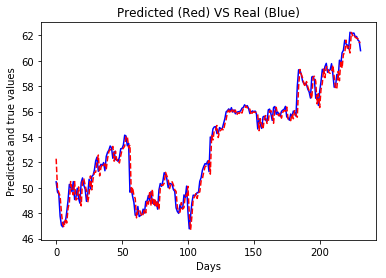

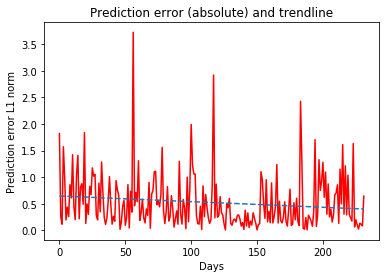

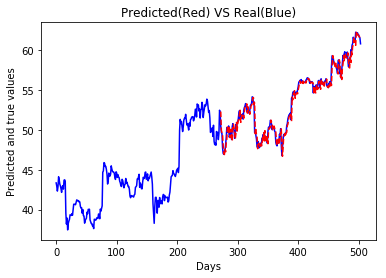

In [75]:
with tf.Session() as sess :
    # 변수 초기화 
    sess.run(tf.global_variables_initializer())
    # 한 세대마다 전체 훈련 데이터 셋이 텐서플로 그래프에 공급 
    
    for i in range(n_epochs):
        train_cost,_ = sess.run([cost, train_op], feed_dict={X_tf:train_X, y_tf:train_y})
        print("Training iteration", i, "MSE", train_cost)
    
    # 훈련시킨 다음 테스트 데이터 셋에 대해 성능을 확인
    test_cost, y_pr = sess.run([cost, y_pred], feed_dict={X_tf:test_X, y_tf:test_y})
    print("Test dataset: ", test_cost)
    
    # 결과 평가 
    evaluate_ts(test_X, test_y, y_pr)
    
    # 예측값이 어떻게 보이는지 확인 
    plt.plot(range(len(stock_values)), stock_values, 'b')
    plt.plot(range(len(stock_values)-test_size, len(stock_values)), y_pr, 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted(Red) VS Real(Blue)")
    plt.show()